# Anomali Analizleri ve Uyarı Sistemleri

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
# Veriyi yükle
df = pd.read_csv("yeni_veri/firin_verileri_temizlenmis.csv")

In [3]:
df.head()

,datetime,prg,giris_isi,on_isitma_set_isi,on_isitma_isi,on_isitma_guc_%,on_isitma_amp.,ceh.1_ust1_set_isi,ceh.1_ust1_isi,ceh.1_ust1_guc_%,...,ceh.3_alt2_set_isi,ceh.3_alt2_isi,ceh.3_alt2_guc_%,ceh.3_alt2_amp.,sogutma1_isi,sogutma2_isi,sogutma3_isi,rulo_frekans_hz,giris_per.fan_hz,cikis_per.fan_hz
0,2024-11-01 08:00:00,1.0,337.0,550.0,549.0,75.0,647.0,680.0,705.0,0.0,...,840.0,838.0,36.0,305.0,738.0,636.0,504.0,3250.0,2750.0,0.0
1,2024-11-01 08:01:00,1.0,343.0,550.0,547.0,75.0,641.0,680.0,701.0,0.0,...,840.0,841.0,39.0,336.0,740.0,639.0,505.0,3250.0,2750.0,0.0
2,2024-11-01 08:02:00,1.0,336.0,550.0,551.0,74.0,638.0,680.0,704.0,0.0,...,840.0,843.0,25.0,266.0,738.0,636.0,505.0,3250.0,2750.0,0.0
3,2024-11-01 08:03:00,1.0,329.0,550.0,547.0,75.0,645.0,680.0,709.0,0.0,...,840.0,843.0,10.0,149.0,740.0,639.0,505.0,3250.0,2750.0,0.0
4,2024-11-01 08:04:00,1.0,345.0,550.0,552.0,69.0,495.0,680.0,704.0,0.0,...,840.0,840.0,10.0,148.0,737.0,636.0,504.0,3250.0,2750.0,0.0


In [4]:
df.shape

(22140, 57)

In [5]:
# Sütun kontrol 
print(df.columns)

Index(['datetime', 'prg', 'giris_isi', 'on_isitma_set_isi', 'on_isitma_isi',
       'on_isitma_guc_%', 'on_isitma_amp.', 'ceh.1_ust1_set_isi',
       'ceh.1_ust1_isi', 'ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.',
       'ceh.1_ust2_set_isi', 'ceh.1_ust2__isi', 'ceh.1_ust2_guc_%',
       'ceh.1_ust2_amp.', 'ceh.1_alt1_set_isi', 'ceh.1_alt1_isi',
       'ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.', 'ceh.2_ust1_set_isi',
       'ceh.2_ust1_isi', 'ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.',
       'ceh.2_ust2_set_isi', 'ceh.2_ust2_isi', 'ceh.2_ust2_guc_%',
       'ceh.2_ust2_amp.', 'ceh.2_alt1_set_isi', 'ceh.2_alt1_isi',
       'ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.', 'ceh.2_alt2_set_isi',
       'ceh.2_alt2_isi', 'ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.',
       'ceh.3_ust1_set_isi', 'ceh.3_ust1_isi', 'ceh.3_ust1_guc_%',
       'ceh.3_ust1_amp.', 'ceh.3_ust2_set_isi', 'ceh.3_ust2_isi',
       'ceh.3_ust2_guc_%', 'ceh.3_ust2_amp.', 'ceh.3_alt1_set_isi',
       'ceh.3_alt1_isi', 'ceh.3_alt1_guc_%', 'ceh.3_alt1_amp.

# “Ani 0'lanmalar Olmayan” ve "Sabit Değerler İçermeyen" SÜTUNLAR ÜZERİNDE ANALİZ

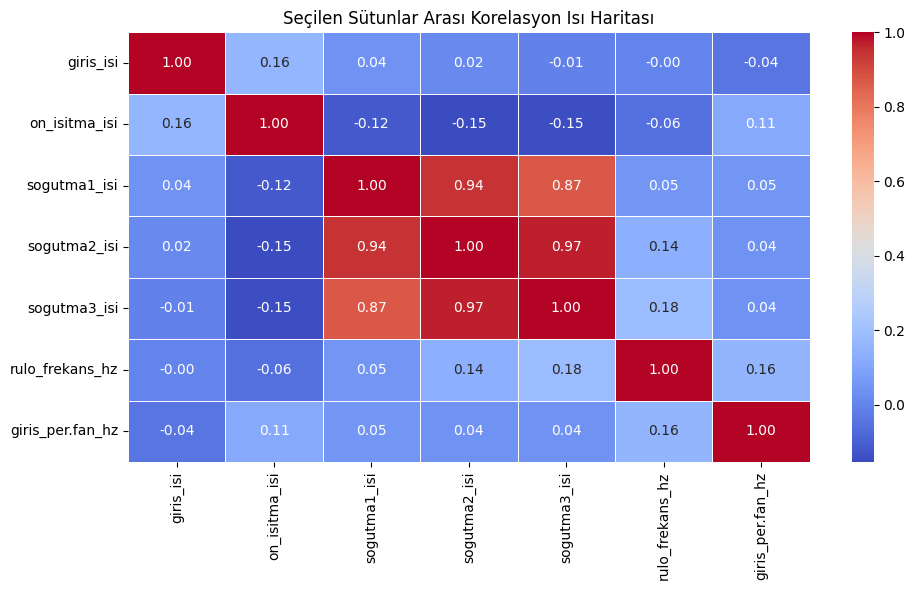

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

target_columns = [
    "giris_isi",
    "on_isitma_isi",
    "sogutma1_isi",
    "sogutma2_isi",
    "sogutma3_isi",
    "rulo_frekans_hz",
    "giris_per.fan_hz"
]

selected_df = df[target_columns]

# Korelasyon matrisi
corr_matrix = selected_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Seçilen Sütunlar Arası Korelasyon Isı Haritası")
plt.tight_layout()
plt.show()

#### `sogutma1_isi`, `sogutma2_isi`, `sogutma3_isi` İçin Rolling Z-score ile Anomali Tespiti  

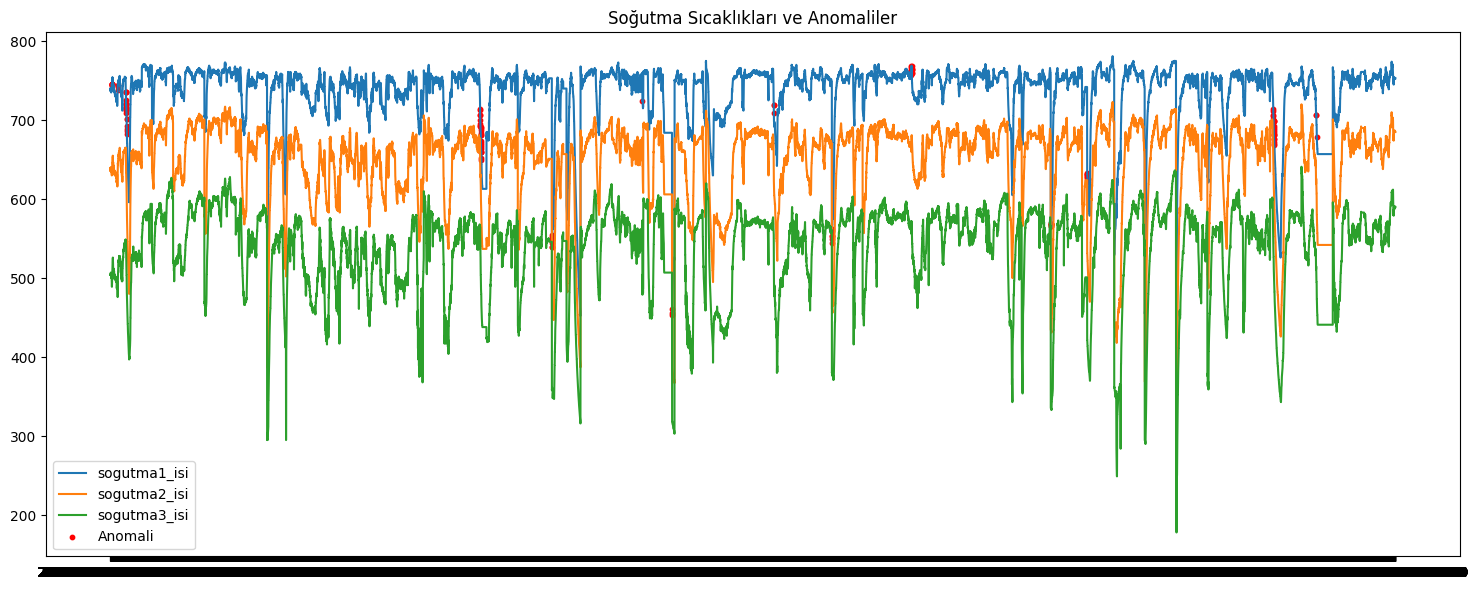

Toplam Anomali Sayısı: 133


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df.set_index("datetime", inplace=True)

cols = ["sogutma1_isi", "sogutma2_isi", "sogutma3_isi"]
data = df[cols]

# Rolling z-score hesaplayan fonksiyon
def rolling_zscore(series, window=540):
    return (series - series.rolling(window, min_periods=1).mean()) / series.rolling(window, min_periods=1).std()

# Her sütun için rolling z-score hesapla
z_scores = data.apply(lambda col: rolling_zscore(col, window=540))

# Z-score farklarını hesapla
z_diff_1_2 = (z_scores["sogutma1_isi"] - z_scores["sogutma2_isi"]).abs()
z_diff_2_3 = (z_scores["sogutma2_isi"] - z_scores["sogutma3_isi"]).abs()
z_diff_1_3 = (z_scores["sogutma1_isi"] - z_scores["sogutma3_isi"]).abs()

# Anomali eşik değeri
threshold = 2.5

# Anomali maskesi oluştur
anomaly_mask = (z_diff_1_2 > threshold) | (z_diff_2_3 > threshold) | (z_diff_1_3 > threshold)

# Anomali etiketlerini dataframe'e ekle
df["sogutma_anomali"] = anomaly_mask.astype(int)


plt.figure(figsize=(15,6))
plt.plot(df.index, data["sogutma1_isi"], label="sogutma1_isi")
plt.plot(df.index, data["sogutma2_isi"], label="sogutma2_isi")
plt.plot(df.index, data["sogutma3_isi"], label="sogutma3_isi")
plt.scatter(df.index[anomaly_mask], data["sogutma1_isi"][anomaly_mask], color="red", label="Anomali", s=10)
plt.title("Soğutma Sıcaklıkları ve Anomaliler")
plt.legend()
plt.tight_layout()
plt.show()

# Anomali zamanları
anomaly_times = df[df["sogutma_anomali"] == 1].index
print(f"Toplam Anomali Sayısı: {len(anomaly_times)}")


In [8]:
df.columns

Index(['prg', 'giris_isi', 'on_isitma_set_isi', 'on_isitma_isi',
       'on_isitma_guc_%', 'on_isitma_amp.', 'ceh.1_ust1_set_isi',
       'ceh.1_ust1_isi', 'ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.',
       'ceh.1_ust2_set_isi', 'ceh.1_ust2__isi', 'ceh.1_ust2_guc_%',
       'ceh.1_ust2_amp.', 'ceh.1_alt1_set_isi', 'ceh.1_alt1_isi',
       'ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.', 'ceh.2_ust1_set_isi',
       'ceh.2_ust1_isi', 'ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.',
       'ceh.2_ust2_set_isi', 'ceh.2_ust2_isi', 'ceh.2_ust2_guc_%',
       'ceh.2_ust2_amp.', 'ceh.2_alt1_set_isi', 'ceh.2_alt1_isi',
       'ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.', 'ceh.2_alt2_set_isi',
       'ceh.2_alt2_isi', 'ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.',
       'ceh.3_ust1_set_isi', 'ceh.3_ust1_isi', 'ceh.3_ust1_guc_%',
       'ceh.3_ust1_amp.', 'ceh.3_ust2_set_isi', 'ceh.3_ust2_isi',
       'ceh.3_ust2_guc_%', 'ceh.3_ust2_amp.', 'ceh.3_alt1_set_isi',
       'ceh.3_alt1_isi', 'ceh.3_alt1_guc_%', 'ceh.3_alt1_amp.',
       'c

In [9]:
df.head()

,prg,giris_isi,on_isitma_set_isi,on_isitma_isi,on_isitma_guc_%,on_isitma_amp.,ceh.1_ust1_set_isi,ceh.1_ust1_isi,ceh.1_ust1_guc_%,ceh.1_ust1_amp.,...,ceh.3_alt2_isi,ceh.3_alt2_guc_%,ceh.3_alt2_amp.,sogutma1_isi,sogutma2_isi,sogutma3_isi,rulo_frekans_hz,giris_per.fan_hz,cikis_per.fan_hz,sogutma_anomali
datetime,,,,,,,,,,,,,,,,,,,,,
2024-11-01 08:00:00,1.0,337.0,550.0,549.0,75.0,647.0,680.0,705.0,0.0,0.0,...,838.0,36.0,305.0,738.0,636.0,504.0,3250.0,2750.0,0.0,0
2024-11-01 08:01:00,1.0,343.0,550.0,547.0,75.0,641.0,680.0,701.0,0.0,0.0,...,841.0,39.0,336.0,740.0,639.0,505.0,3250.0,2750.0,0.0,0
2024-11-01 08:02:00,1.0,336.0,550.0,551.0,74.0,638.0,680.0,704.0,0.0,0.0,...,843.0,25.0,266.0,738.0,636.0,505.0,3250.0,2750.0,0.0,0
2024-11-01 08:03:00,1.0,329.0,550.0,547.0,75.0,645.0,680.0,709.0,0.0,0.0,...,843.0,10.0,149.0,740.0,639.0,505.0,3250.0,2750.0,0.0,0
2024-11-01 08:04:00,1.0,345.0,550.0,552.0,69.0,495.0,680.0,704.0,0.0,0.0,...,840.0,10.0,148.0,737.0,636.0,504.0,3250.0,2750.0,0.0,0


### Diğer Sütunların Anomali Analizi 
- Her tekil sensör kolonu için istatistiksel anomali tespiti yapıldı

In [10]:

import pandas as pd
import numpy as np

def rolling_zscore_anomali(df, column, window=540, threshold=3):
    rolling_mean = df[column].rolling(window=window, min_periods=1).mean()
    rolling_std = df[column].rolling(window=window, min_periods=1).std()
    z_scores = (df[column] - rolling_mean) / rolling_std
    return (np.abs(z_scores) > threshold).astype(int)

# Hedef kolonlar
target_columns = [
    "giris_isi",
    "on_isitma_isi",
    "rulo_frekans_hz",
    "giris_per.fan_hz"
]

# Anomali sütunlarını oluştur
for col in target_columns:
    anomali_col = f"{col}_anomali"
    df[anomali_col] = rolling_zscore_anomali(df, col)

# Sonuçları özetleme
anomaly_summary = {
    col: df[f"{col}_anomali"].sum()
    for col in target_columns
}

print("🔍 Anomali Sayıları:")
for col, count in anomaly_summary.items():
    print(f"{col}: {count} adet")

# İlk birkaç satırs
df[[col for col in df.columns if "anomali" in col]].head()


🔍 Anomali Sayıları:
giris_isi: 725 adet
on_isitma_isi: 462 adet
rulo_frekans_hz: 514 adet
giris_per.fan_hz: 525 adet


,sogutma_anomali,giris_isi_anomali,on_isitma_isi_anomali,rulo_frekans_hz_anomali,giris_per.fan_hz_anomali
datetime,,,,,
2024-11-01 08:00:00,0,0,0,0,0
2024-11-01 08:01:00,0,0,0,0,0
2024-11-01 08:02:00,0,0,0,0,0
2024-11-01 08:03:00,0,0,0,0,0
2024-11-01 08:04:00,0,0,0,0,0


#### Uzun Süreli Anomaliler (5 dakikadan uzun)

In [11]:
def grupla_anomaliler(df, column_anomali, min_uzunluk=5):
    df['grup'] = (df[column_anomali] != df[column_anomali].shift()).cumsum()
    gruplar = df.groupby('grup')[column_anomali].sum()
    uzun_gruplar = gruplar[gruplar >= min_uzunluk].index
    return df[df['grup'].isin(uzun_gruplar)]

# Anomali sütunları
anomali_sutunlari = [
    'giris_isi_anomali',
    'on_isitma_isi_anomali',
    'sogutma_anomali',
    'rulo_frekans_hz_anomali',
    'giris_per.fan_hz_anomali'
]

# Her biri için uzun anomalileri bulunur
for sutun in anomali_sutunlari:
    uzun_anomaliler = grupla_anomaliler(df.copy(), sutun, min_uzunluk=5)
    print(f"{sutun} - Uzun anomaliler: {uzun_anomaliler.shape[0]} satır")


giris_isi_anomali - Uzun anomaliler: 657 satır
on_isitma_isi_anomali - Uzun anomaliler: 414 satır
sogutma_anomali - Uzun anomaliler: 112 satır
rulo_frekans_hz_anomali - Uzun anomaliler: 388 satır


giris_per.fan_hz_anomali - Uzun anomaliler: 354 satır


## Anomali Etki Analizi (Impact Analysis)

- Anomali tespiti yapılan sütunların, diğer hedef sütunlardaki etkileri incelendi. Z-score ile bulunan anomali zamanlarında diğer sütunların ortalama ve standart sapma değerleri karşılaştırıldı.

In [12]:
# 🔍 Anomali kolonları ve hedef kolonlar
anomaly_columns = [
    "giris_isi_anomali",
    "on_isitma_isi_anomali",
    "sogutma_anomali",
    "rulo_frekans_hz_anomali",
    "giris_per.fan_hz_anomali"
]

# Hedef kolonlar (etkisinin incelemek istendiği kolonlar)
target_cols = [
    "giris_isi", "on_isitma_isi", "sogutma1_isi", 
    "sogutma2_isi", "sogutma3_isi", "rulo_frekans_hz", "giris_per.fan_hz"
]

# Her anomaly_col ve target_col kombinasyonu için analiz
for anomaly_col in anomaly_columns:
    print(f"\n🧪 Anomali Kolonu: {anomaly_col}")
    for col in target_cols:
        try:
            normal_vals = df[df[anomaly_col] == 0][col]
            anomaly_vals = df[df[anomaly_col] == 1][col]

            print(f"\n🎯 Hedef Kolon: {col}")
            print(f"• Normal Ortalama: {normal_vals.mean():.2f}")
            print(f"• Anomali Ortalama: {anomaly_vals.mean():.2f}")
            print(f"• Ortalama Farkı: {(anomaly_vals.mean() - normal_vals.mean()):.2f}")
            print(f"• Normal Std: {normal_vals.std():.2f}")
            print(f"• Anomali Std: {anomaly_vals.std():.2f}")
            print(f"• Std Farkı: {(anomaly_vals.std() - normal_vals.std()):.2f}")
            print("-" * 50)
        except Exception as e:
            print(f"⚠️ {anomaly_col} - {col} analizinde hata: {e}")
            print("-" * 50)



🧪 Anomali Kolonu: giris_isi_anomali

🎯 Hedef Kolon: giris_isi
• Normal Ortalama: 190.98
• Anomali Ortalama: -1720.56
• Ortalama Farkı: -1911.53
• Normal Std: 710.34
• Anomali Std: 1858.17
• Std Farkı: 1147.84
--------------------------------------------------

🎯 Hedef Kolon: on_isitma_isi
• Normal Ortalama: 530.02
• Anomali Ortalama: 523.45
• Ortalama Farkı: -6.57
• Normal Std: 24.71
• Anomali Std: 40.58
• Std Farkı: 15.87
--------------------------------------------------

🎯 Hedef Kolon: sogutma1_isi
• Normal Ortalama: 737.87
• Anomali Ortalama: 715.88
• Ortalama Farkı: -22.00
• Normal Std: 38.80
• Anomali Std: 60.82
• Std Farkı: 22.02
--------------------------------------------------

🎯 Hedef Kolon: sogutma2_isi
• Normal Ortalama: 649.97
• Anomali Ortalama: 629.40
• Ortalama Farkı: -20.57
• Normal Std: 53.21
• Anomali Std: 73.39
• Std Farkı: 20.17
--------------------------------------------------

🎯 Hedef Kolon: sogutma3_isi
• Normal Ortalama: 537.93
• Anomali Ortalama: 522.39
• O

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Anomali sütunları
anomaly_columns = [
    "giris_isi_anomali",
    "on_isitma_isi_anomali",
    "sogutma_anomali",
    "rulo_frekans_hz_anomali",
    "giris_per.fan_hz_anomali"
]

# Hedef kolonlar (etkisinin incelenmek istedinği kolonlar)
target_cols = [
    "giris_isi", "on_isitma_isi", "sogutma1_isi", 
    "sogutma2_isi", "sogutma3_isi", "rulo_frekans_hz", "giris_per.fan_hz"
]

# Verileri saklamak için boş dict
heatmap_mean_data = {}
heatmap_std_data = {}

# Her anomali kolonu için
for anomaly_col in anomaly_columns:
    mean_diffs = []
    std_diffs = []

    for col in target_cols:
        normal_vals = df[df[anomaly_col] == False][col]
        anomaly_vals = df[df[anomaly_col] == True][col]

        mean_diff = anomaly_vals.mean() - normal_vals.mean()
        std_diff = anomaly_vals.std() - normal_vals.std()

        mean_diffs.append(mean_diff)
        std_diffs.append(std_diff)

    heatmap_mean_data[anomaly_col] = mean_diffs
    heatmap_std_data[anomaly_col] = std_diffs

# DataFrame'e çevir
df_mean_diff = pd.DataFrame(heatmap_mean_data, index=target_cols)
df_std_diff = pd.DataFrame(heatmap_std_data, index=target_cols)


c:\Users\havva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\947349519.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


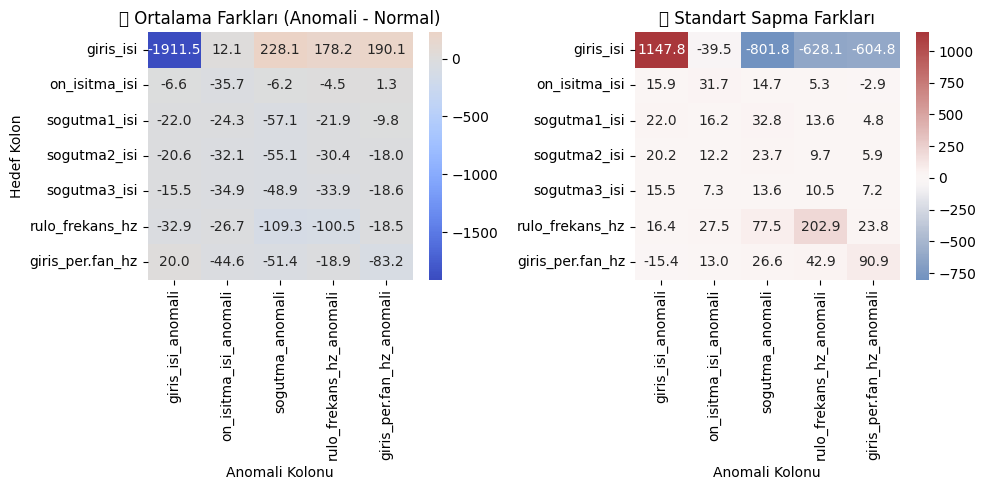

In [14]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(df_mean_diff, annot=True, fmt=".1f", cmap="coolwarm", center=0)
plt.title("📊 Ortalama Farkları (Anomali - Normal)")
plt.xlabel("Anomali Kolonu")
plt.ylabel("Hedef Kolon")

plt.subplot(1, 2, 2)
sns.heatmap(df_std_diff, annot=True, fmt=".1f", cmap="vlag", center=0)
plt.title("📊 Standart Sapma Farkları")
plt.xlabel("Anomali Kolonu")
plt.ylabel("")

plt.tight_layout()
plt.show()

## Uyarı Sistemi Oluşturma

Amaç, sensor verilerindeki kritik değişimleri algılayan, açıklayıcı ve güvenilir bir uyarı sistemi kurmak.

In [15]:
def istatistikleri_hesapla(df):
    stats = {}
    kolonlar = [
        'giris_isi', 'sogutma1_isi', 'sogutma2_isi', 'sogutma3_isi',
        'rulo_frekans_hz', 'giris_per.fan_hz'
    ]

    # Anomali olmayan verileri filtrele
    normal_df = df[
        (df['giris_isi_anomali'] == 0) &
        (df['sogutma_anomali'] == 0) &
        (df['rulo_frekans_hz_anomali'] == 0) &
        (df['giris_per.fan_hz_anomali'] == 0)
    ]

    for col in kolonlar:
        stats[col] = {
            'normal_mean': normal_df[col].mean(),
            'normal_std': normal_df[col].std()
        }

    return stats


In [16]:
def uyarilari_olustur(df, stats):
    uyarilar = []

    for _, row in df.iterrows():
        uyarilar_listesi = []

        # Kritik: Giriş ısısında ani düşüş
        if row['giris_isi'] < stats['giris_isi']['normal_mean'] - 2 * stats['giris_isi']['normal_std']:
            uyarilar_listesi.append("🚨 Giriş Isı Düşüşü")

        # Soğutma sisteminde düşüş
        for sogutma in ['sogutma1_isi', 'sogutma2_isi', 'sogutma3_isi']:
            if row[sogutma] < stats[sogutma]['normal_mean'] - 2 * stats[sogutma]['normal_std']:
                uyarilar_listesi.append(f"⚠️ {sogutma.upper()} Düşüşü")

        # Rulo frekans artışı
        if row['rulo_frekans_hz'] > stats['rulo_frekans_hz']['normal_mean'] + 2 * stats['rulo_frekans_hz']['normal_std']:
            uyarilar_listesi.append("⚠️ Rulo Frekans Artışı")

        # Fan hızı düşüşü
        if row['giris_per.fan_hz'] < stats['giris_per.fan_hz']['normal_mean'] - 2 * stats['giris_per.fan_hz']['normal_std']:
            uyarilar_listesi.append("⚠️ Fan Hızı Düşüşü")

        # Uyarı sonucu
        if uyarilar_listesi:
            uyarilar.append(", ".join(uyarilar_listesi))
        else:
            uyarilar.append("✅ Normal")

    df['uyari'] = uyarilar
    return df


In [17]:
# İstatistikleri hesapla
stats = istatistikleri_hesapla(df)

# Uyarıları oluştur
df = uyarilari_olustur(df, stats)

In [18]:
df.columns

Index(['prg', 'giris_isi', 'on_isitma_set_isi', 'on_isitma_isi',
       'on_isitma_guc_%', 'on_isitma_amp.', 'ceh.1_ust1_set_isi',
       'ceh.1_ust1_isi', 'ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.',
       'ceh.1_ust2_set_isi', 'ceh.1_ust2__isi', 'ceh.1_ust2_guc_%',
       'ceh.1_ust2_amp.', 'ceh.1_alt1_set_isi', 'ceh.1_alt1_isi',
       'ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.', 'ceh.2_ust1_set_isi',
       'ceh.2_ust1_isi', 'ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.',
       'ceh.2_ust2_set_isi', 'ceh.2_ust2_isi', 'ceh.2_ust2_guc_%',
       'ceh.2_ust2_amp.', 'ceh.2_alt1_set_isi', 'ceh.2_alt1_isi',
       'ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.', 'ceh.2_alt2_set_isi',
       'ceh.2_alt2_isi', 'ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.',
       'ceh.3_ust1_set_isi', 'ceh.3_ust1_isi', 'ceh.3_ust1_guc_%',
       'ceh.3_ust1_amp.', 'ceh.3_ust2_set_isi', 'ceh.3_ust2_isi',
       'ceh.3_ust2_guc_%', 'ceh.3_ust2_amp.', 'ceh.3_alt1_set_isi',
       'ceh.3_alt1_isi', 'ceh.3_alt1_guc_%', 'ceh.3_alt1_amp.',
       'c

In [19]:
toplam_uyari_sayisi = df[df['uyari'] != "✅ Normal"].shape[0]
print(f"🔔 Toplam Uyarı Sayısı: {toplam_uyari_sayisi}")


🔔 Toplam Uyarı Sayısı: 4766


In [20]:
from collections import Counter

uyari_listesi = df[df['uyari'] != "✅ Normal"]['uyari'].str.split(', ')
flat_list = [u for sublist in uyari_listesi for u in sublist]
toplam_bireysel_uyari_sayisi = len(flat_list)

print(f"🔔 Bireysel Toplam Uyarı Sayısı: {toplam_bireysel_uyari_sayisi}")
print(Counter(flat_list))


🔔 Bireysel Toplam Uyarı Sayısı: 7125
Counter({'⚠️ Fan Hızı Düşüşü': 1452, '⚠️ SOGUTMA2_ISI Düşüşü': 1356, '⚠️ SOGUTMA1_ISI Düşüşü': 1283, '🚨 Giriş Isı Düşüşü': 1259, '⚠️ SOGUTMA3_ISI Düşüşü': 1122, '⚠️ Rulo Frekans Artışı': 653})


In [21]:
df.shape

(22140, 62)

In [22]:
df.head()

,prg,giris_isi,on_isitma_set_isi,on_isitma_isi,on_isitma_guc_%,on_isitma_amp.,ceh.1_ust1_set_isi,ceh.1_ust1_isi,ceh.1_ust1_guc_%,ceh.1_ust1_amp.,...,sogutma3_isi,rulo_frekans_hz,giris_per.fan_hz,cikis_per.fan_hz,sogutma_anomali,giris_isi_anomali,on_isitma_isi_anomali,rulo_frekans_hz_anomali,giris_per.fan_hz_anomali,uyari
datetime,,,,,,,,,,,,,,,,,,,,,
2024-11-01 08:00:00,1.0,337.0,550.0,549.0,75.0,647.0,680.0,705.0,0.0,0.0,...,504.0,3250.0,2750.0,0.0,0,0,0,0,0,⚠️ Fan Hızı Düşüşü
2024-11-01 08:01:00,1.0,343.0,550.0,547.0,75.0,641.0,680.0,701.0,0.0,0.0,...,505.0,3250.0,2750.0,0.0,0,0,0,0,0,⚠️ Fan Hızı Düşüşü
2024-11-01 08:02:00,1.0,336.0,550.0,551.0,74.0,638.0,680.0,704.0,0.0,0.0,...,505.0,3250.0,2750.0,0.0,0,0,0,0,0,⚠️ Fan Hızı Düşüşü
2024-11-01 08:03:00,1.0,329.0,550.0,547.0,75.0,645.0,680.0,709.0,0.0,0.0,...,505.0,3250.0,2750.0,0.0,0,0,0,0,0,⚠️ Fan Hızı Düşüşü
2024-11-01 08:04:00,1.0,345.0,550.0,552.0,69.0,495.0,680.0,704.0,0.0,0.0,...,504.0,3250.0,2750.0,0.0,0,0,0,0,0,⚠️ Fan Hızı Düşüşü


In [23]:
# Varolan df'de 'datetime' ara işlemlerde kaldırılmış
# datetime verisi doğru olan dosya
df_datetime_icin = pd.read_csv("yeni_veri/firin_verileri_temizlenmis.csv")
df_datetime_icin['datetime'] = pd.to_datetime(df_datetime_icin['datetime'])

# Satır sayısı aynıysa doğrudan aktarabiliriz
df['datetime'] = df_datetime_icin['datetime'].values


In [24]:
df['datetime'].isna().sum()

0

In [25]:
df.head()

,prg,giris_isi,on_isitma_set_isi,on_isitma_isi,on_isitma_guc_%,on_isitma_amp.,ceh.1_ust1_set_isi,ceh.1_ust1_isi,ceh.1_ust1_guc_%,ceh.1_ust1_amp.,...,rulo_frekans_hz,giris_per.fan_hz,cikis_per.fan_hz,sogutma_anomali,giris_isi_anomali,on_isitma_isi_anomali,rulo_frekans_hz_anomali,giris_per.fan_hz_anomali,uyari,datetime
datetime,,,,,,,,,,,,,,,,,,,,,
2024-11-01 08:00:00,1.0,337.0,550.0,549.0,75.0,647.0,680.0,705.0,0.0,0.0,...,3250.0,2750.0,0.0,0,0,0,0,0,⚠️ Fan Hızı Düşüşü,2024-11-01 08:00:00
2024-11-01 08:01:00,1.0,343.0,550.0,547.0,75.0,641.0,680.0,701.0,0.0,0.0,...,3250.0,2750.0,0.0,0,0,0,0,0,⚠️ Fan Hızı Düşüşü,2024-11-01 08:01:00
2024-11-01 08:02:00,1.0,336.0,550.0,551.0,74.0,638.0,680.0,704.0,0.0,0.0,...,3250.0,2750.0,0.0,0,0,0,0,0,⚠️ Fan Hızı Düşüşü,2024-11-01 08:02:00
2024-11-01 08:03:00,1.0,329.0,550.0,547.0,75.0,645.0,680.0,709.0,0.0,0.0,...,3250.0,2750.0,0.0,0,0,0,0,0,⚠️ Fan Hızı Düşüşü,2024-11-01 08:03:00
2024-11-01 08:04:00,1.0,345.0,550.0,552.0,69.0,495.0,680.0,704.0,0.0,0.0,...,3250.0,2750.0,0.0,0,0,0,0,0,⚠️ Fan Hızı Düşüşü,2024-11-01 08:04:00


In [26]:
## Her satır için etikete sahip df 'Arıza Tahmin Modelinde' kullanılmak Üzere Kaydedilir
df.to_csv("yeni_veri/ariza_tahmin_modeli_sicaklik_fan_rulo_icin_veri.csv", index=False)

## Güç (%) ve Akım (A) Tabanlı Anomali Tespiti ve Durum Analizi

In [27]:
# Veriyi yükle
df = pd.read_csv("yeni_veri/firin_verileri_temizlenmis.csv")

In [28]:
df.head()

,datetime,prg,giris_isi,on_isitma_set_isi,on_isitma_isi,on_isitma_guc_%,on_isitma_amp.,ceh.1_ust1_set_isi,ceh.1_ust1_isi,ceh.1_ust1_guc_%,...,ceh.3_alt2_set_isi,ceh.3_alt2_isi,ceh.3_alt2_guc_%,ceh.3_alt2_amp.,sogutma1_isi,sogutma2_isi,sogutma3_isi,rulo_frekans_hz,giris_per.fan_hz,cikis_per.fan_hz
0,2024-11-01 08:00:00,1.0,337.0,550.0,549.0,75.0,647.0,680.0,705.0,0.0,...,840.0,838.0,36.0,305.0,738.0,636.0,504.0,3250.0,2750.0,0.0
1,2024-11-01 08:01:00,1.0,343.0,550.0,547.0,75.0,641.0,680.0,701.0,0.0,...,840.0,841.0,39.0,336.0,740.0,639.0,505.0,3250.0,2750.0,0.0
2,2024-11-01 08:02:00,1.0,336.0,550.0,551.0,74.0,638.0,680.0,704.0,0.0,...,840.0,843.0,25.0,266.0,738.0,636.0,505.0,3250.0,2750.0,0.0
3,2024-11-01 08:03:00,1.0,329.0,550.0,547.0,75.0,645.0,680.0,709.0,0.0,...,840.0,843.0,10.0,149.0,740.0,639.0,505.0,3250.0,2750.0,0.0
4,2024-11-01 08:04:00,1.0,345.0,550.0,552.0,69.0,495.0,680.0,704.0,0.0,...,840.0,840.0,10.0,148.0,737.0,636.0,504.0,3250.0,2750.0,0.0


In [29]:
# Kolon çiftleri
kolon_ciftleri = [
    ('on_isitma_guc_%', 'on_isitma_amp.'),
    ('ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.'),
    ('ceh.1_ust2_guc_%', 'ceh.1_ust2_amp.'),
    ('ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.'),
    ('ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.'),
    ('ceh.2_ust2_guc_%', 'ceh.2_ust2_amp.'),
    ('ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.'),
    ('ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.'),
    ('ceh.3_ust1_guc_%', 'ceh.3_ust1_amp.'),
    ('ceh.3_ust2_guc_%', 'ceh.3_ust2_amp.'),
    ('ceh.3_alt1_guc_%', 'ceh.3_alt1_amp.'),
    ('ceh.3_alt2_guc_%', 'ceh.3_alt2_amp.')
]

In [30]:
for guc_kolon, amp_kolon in kolon_ciftleri:
    print(f"{guc_kolon} description: ")
    print(df[guc_kolon].describe())

    print(f"{amp_kolon} description: ")
    print(df[amp_kolon].describe())

    print(f"\n {guc_kolon} ve {amp_kolon} arasındaki korelasyon: ")
    print(df[[guc_kolon,amp_kolon]].corr())
    
    print("----------------------------------------")
    

on_isitma_guc_% description: 
count    22140.000000
mean        68.537986
std         15.163992
min          0.000000
25%         70.000000
50%         75.000000
75%         75.000000
max         75.000000
Name: on_isitma_guc_%, dtype: float64
on_isitma_amp. description: 
count    22140.000000
mean       570.215989
std        174.964726
min          0.000000
25%        515.000000
50%        644.000000
75%        659.000000
max        996.000000
Name: on_isitma_amp., dtype: float64

 on_isitma_guc_% ve on_isitma_amp. arasındaki korelasyon: 
                 on_isitma_guc_%  on_isitma_amp.
on_isitma_guc_%         1.000000        0.624658
on_isitma_amp.          0.624658        1.000000
----------------------------------------
ceh.1_ust1_guc_% description: 
count    22140.000000
mean        34.371635
std         26.571905
min          0.000000
25%         10.000000
50%         33.000000
75%         63.000000
max         70.000000
Name: ceh.1_ust1_guc_%, dtype: float64
ceh.1_ust1_amp. desc

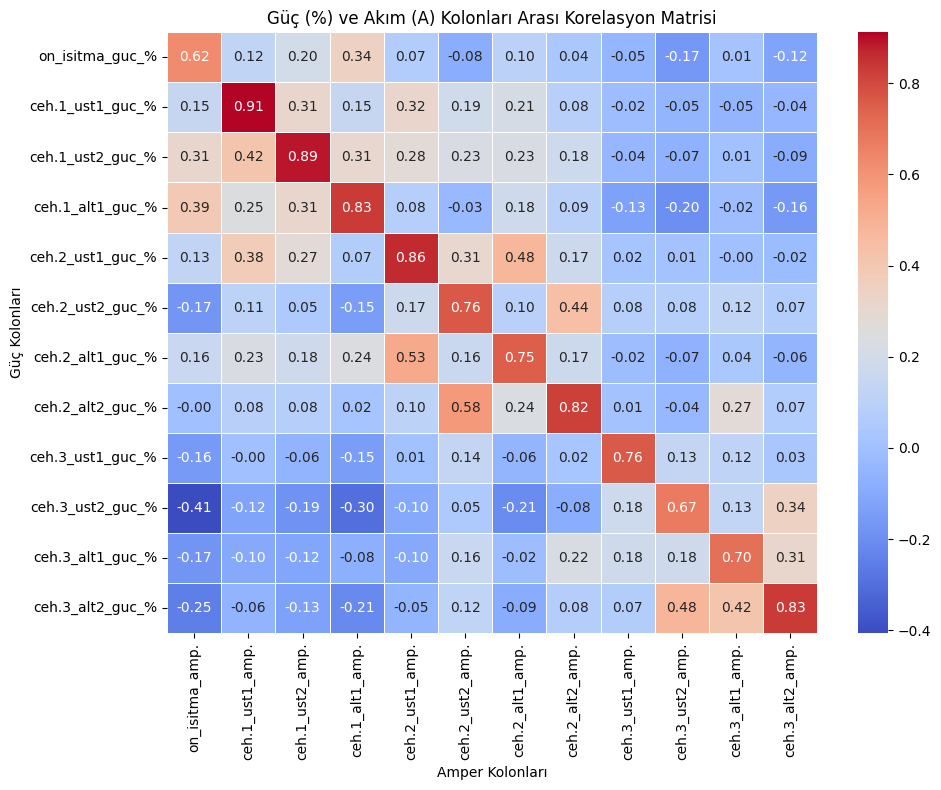

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kolon isimlerini ayır
guc_kolonlari = [guc for guc, _ in kolon_ciftleri]
amp_kolonlari = [amp for _, amp in kolon_ciftleri]

# Sadece bu kolonlardan oluşan veri
df_subset = df[guc_kolonlari + amp_kolonlari]

# Korelasyon matrisi
corr_matrix = df_subset.corr().loc[guc_kolonlari, amp_kolonlari]  # sadece güç vs amper ilişkileri

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Güç (%) ve Akım (A) Kolonları Arası Korelasyon Matrisi")
plt.xlabel("Amper Kolonları")
plt.ylabel("Güç Kolonları")
plt.tight_layout()
plt.show()


In [32]:
# 'datetime'dan 'tarih' ve 'saat' verisi çıkarma 
df['datetime'] = pd.to_datetime(df['datetime'])  
df = df.set_index('datetime')  
df['tarih'] = df.index.date
df['saat'] = df.index.hour

## Sensör Durum Sınıflandırması

- Temel amaç, güç (%) ve akım (amp) sensör değerleri arasındaki ilişkiye göre fırın bileşenlerinin durumlarını sınıflandırmak ve arıza anlarını analiz etmek.

In [33]:
df = pd.read_csv("yeni_veri/firin_verileri_temizlenmis.csv")

In [34]:
# guç ve amper kolonları (Korelasyonları 0.80'den büyük olanlar)
kolon_ciftleri = [
    ('ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.'),
    ('ceh.1_ust2_guc_%', 'ceh.1_ust2_amp.'),
    ('ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.'),
    ('ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.'),
    ('ceh.2_ust2_guc_%', 'ceh.2_ust2_amp.'),
    ('ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.'),
    ('ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.'),
    ('ceh.3_alt2_guc_%', 'ceh.3_alt2_amp.')
]

Kural Tabanlı Sınıflandırma

In [35]:
# === Durum sınıflandırıcı fonksiyon ===
def durum_siniflandir(guc, akim):
    if guc >= 9 and akim >= 130:
        return "✅ Isıtma aktif"
    elif akim == 0 and guc == 0:
        return "🔍 Arızalı/Durmuş Kontrol Edilmeli"
    elif akim >= 130 and guc == 0:
        return "⚠️ Güç sensör hatası"
    elif akim == 0 and guc >= 9:
        return "⚠️ Akım sensör hatası"
    else:
        return "🤔 Diğer"

In [36]:
for guc_kolon, amp_kolon in kolon_ciftleri:
    durum_kolon = guc_kolon.replace('guc_%', 'durum')

    # Durum sınıflandırması
    df[durum_kolon] = df.apply(
        lambda row: durum_siniflandir(row[guc_kolon], row[amp_kolon]),
        axis=1
    )

    # Durum sayısı özeti
    durum_sayilari = df[durum_kolon].value_counts()
    print(f"📊 {durum_kolon} Durum Özeti:")
    print(durum_sayilari)
    print("--------------------------------------------------")

📊 ceh.1_ust1_durum Durum Özeti:
ceh.1_ust1_durum
✅ Isıtma aktif                       17951
🔍 Arızalı/Durmuş Kontrol Edilmeli     3664
⚠️ Akım sensör hatası                  414
⚠️ Güç sensör hatası                    73
🤔 Diğer                                 38
Name: count, dtype: int64
--------------------------------------------------
📊 ceh.1_ust2_durum Durum Özeti:
ceh.1_ust2_durum
✅ Isıtma aktif                       20132
🔍 Arızalı/Durmuş Kontrol Edilmeli     1111
🤔 Diğer                                439
⚠️ Akım sensör hatası                  431
⚠️ Güç sensör hatası                    27
Name: count, dtype: int64
--------------------------------------------------
📊 ceh.1_alt1_durum Durum Özeti:
ceh.1_alt1_durum
✅ Isıtma aktif                       17669
🔍 Arızalı/Durmuş Kontrol Edilmeli     2500
⚠️ Akım sensör hatası                 1222
🤔 Diğer                                385
⚠️ Güç sensör hatası                   364
Name: count, dtype: int64
----------------------------

In [37]:
# Bu kod her satır için tüm bileşenlerin durumlarını tarıyor ve eğer herhangi birinde bir uyarı durumu varsa o satıra '🚨 Uyarı', yoksa '✅ Normal' etiketi veriyor.

# Korelasyonları yüksek olan hedef sütunlar
durum_kolonlari = [
    'ceh.1_ust1_durum', 'ceh.1_ust2_durum',
    'ceh.1_alt1_durum', 'ceh.2_ust1_durum', 'ceh.2_ust2_durum',
    'ceh.2_alt1_durum', 'ceh.2_alt2_durum', 'ceh.3_alt2_durum'
]

uyari_durumlari = [
    '🔍 Arızalı/Durmuş Kontrol Edilmeli',
    '⚠️ Akım sensör hatası',
    '⚠️ Güç sensör hatası',
    '🤔 Diğer'
]

# Satırda herhangi bir uyarı varsa "🚨 Uyarı", yoksa "✅ Normal"
df['genel_uyari'] = df[durum_kolonlari].apply(
    lambda row: '🚨 Uyarı' if any(durum in uyari_durumlari for durum in row) else '✅ Normal',
    axis=1
)


In [38]:
# Toplam uyarı sayısı
toplam_uyari = (df['genel_uyari'] == '🚨 Uyarı').sum()
print(f"Toplam uyarı sayısı: {toplam_uyari}")

Toplam uyarı sayısı: 11286


In [39]:
# Toplam uyarı sayısı
toplam_uyari = (df['genel_uyari'] == '✅ Normal').sum()
print(f"Toplam uyarı sayısı: {toplam_uyari}")

Toplam uyarı sayısı: 10854


In [40]:
df.columns

Index(['datetime', 'prg', 'giris_isi', 'on_isitma_set_isi', 'on_isitma_isi',
       'on_isitma_guc_%', 'on_isitma_amp.', 'ceh.1_ust1_set_isi',
       'ceh.1_ust1_isi', 'ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.',
       'ceh.1_ust2_set_isi', 'ceh.1_ust2__isi', 'ceh.1_ust2_guc_%',
       'ceh.1_ust2_amp.', 'ceh.1_alt1_set_isi', 'ceh.1_alt1_isi',
       'ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.', 'ceh.2_ust1_set_isi',
       'ceh.2_ust1_isi', 'ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.',
       'ceh.2_ust2_set_isi', 'ceh.2_ust2_isi', 'ceh.2_ust2_guc_%',
       'ceh.2_ust2_amp.', 'ceh.2_alt1_set_isi', 'ceh.2_alt1_isi',
       'ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.', 'ceh.2_alt2_set_isi',
       'ceh.2_alt2_isi', 'ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.',
       'ceh.3_ust1_set_isi', 'ceh.3_ust1_isi', 'ceh.3_ust1_guc_%',
       'ceh.3_ust1_amp.', 'ceh.3_ust2_set_isi', 'ceh.3_ust2_isi',
       'ceh.3_ust2_guc_%', 'ceh.3_ust2_amp.', 'ceh.3_alt1_set_isi',
       'ceh.3_alt1_isi', 'ceh.3_alt1_guc_%', 'ceh.3_alt1_amp.

### Arızalar İçin Durum Analizi

Amaç, üretim sürecinde yaşanan arızaları sistematik olarak tespit ederek, bu arızaların ne zaman, ne kadar süreyle ve ne sıklıkla meydana geldiğini analiz etmektir.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import time


# === Uzun süreli arızaları getiren fonksiyon ===
def ariza_gruplarini_getir(df, durum_kolon, zaman_kolon="datetime", ariza_durumu="🔍 Arızalı/Durmuş Kontrol Edilmeli"):
    def tamamen_mesai_icinde(grup):
        bas_dt = grup["baslangic"]
        bit_dt = grup["bitis"]
        ayni_gun_mu = bas_dt.date() == bit_dt.date()
        mesai_baslangic = time(8, 0, 0)
        mesai_bitis = time(16, 59, 59)
        saat_araliginda_mi = (
            mesai_baslangic <= bas_dt.time() <= mesai_bitis and
            mesai_baslangic <= bit_dt.time() <= mesai_bitis
        )
        return ayni_gun_mu and saat_araliginda_mi

    df = df.sort_values(zaman_kolon)
    df["durum_shift"] = df[durum_kolon].shift(1)
    df["yeni_grup"] = (df[durum_kolon] != df["durum_shift"]).cumsum()

    ariza_df = df[df[durum_kolon] == ariza_durumu]
    ariza_gruplari = ariza_df.groupby("yeni_grup").agg(
        baslangic=(zaman_kolon, "first"),
        bitis=(zaman_kolon, "last"),
        dakika=(zaman_kolon, lambda x: (x.max() - x.min()).total_seconds() / 60),
        adet=(zaman_kolon, "count")
    ).reset_index()

    ariza_gruplari["mesai_ici"] = ariza_gruplari.apply(tamamen_mesai_icinde, axis=1)

    uzun_duruslar = ariza_gruplari[
        (ariza_gruplari["dakika"] >= 5) & (ariza_gruplari["mesai_ici"])
    ]
    return uzun_duruslar

# === Grafik 1: Günlük toplam duruş süresi ===
def gunluk_durus_suresi_grafigi(arizalar, baslik_etiket, ariza_durumu="🔍 Arızalı/Durmuş Kontrol Edilmeli"):
    df = arizalar.copy()
    df["tarih"] = df["baslangic"].dt.date
    gunluk_durus = df.groupby("tarih")["dakika"].sum().reset_index()
    gunluk_durus = gunluk_durus.sort_values("dakika", ascending=False)

    plt.figure(figsize=(6, 4))
    plt.bar(gunluk_durus["tarih"].astype(str), gunluk_durus["dakika"], color='firebrick')
    plt.xticks(rotation=45)
    plt.title(f"{ariza_durumu} / 🔧 Günlük Duruş Süresi - {baslik_etiket}")
    plt.xlabel("Tarih")
    plt.ylabel("Toplam Duruş Süresi (dk)")
    plt.tight_layout()
    plt.show()

    return gunluk_durus

# === Grafik 2: Saatlik duruş süresi === Hangi günlerde toplamda ne kadar süre arıza olmuş, bar grafiğiyle gösterir.En çok duruş olan günleri hızlıca görmeyi sağlar.
def saatlik_durus_suresi_grafigi(arizalar, ariza_durumu = "🔍 Arızalı/Durmuş Kontrol Edilmeli"):
    df = arizalar.copy()
    df["saat"] = df["baslangic"].dt.hour
    saatlik_durus = df.groupby("saat")["dakika"].sum().reset_index()

    plt.figure(figsize=(6, 4))
    plt.bar(saatlik_durus["saat"], saatlik_durus["dakika"], color='orange')
    plt.xticks(saatlik_durus["saat"])
    plt.title(f"{ariza_durumu} / ⏰ Saatlik Toplam Duruş Süresi")
    plt.xlabel("Saat")
    plt.ylabel("Toplam Duruş (dk)")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    return saatlik_durus

# === Grafik 3: Arıza anlarında güç ve akım ===
def ariza_anlarinda_guc_ve_akim_grafigi(df, guc_kolon, amp_kolon, durum_kolon, ariza_durumu="🔍 Arızalı/Durmuş Kontrol Edilmeli"):
    ariza_df = df[df[durum_kolon] == ariza_durumu]

    plt.figure(figsize=(6, 4))
    plt.plot(ariza_df["datetime"], ariza_df[guc_kolon], label="Güç (%)", color="red")
    plt.plot(ariza_df["datetime"], ariza_df[amp_kolon], label="Akım (Amp)", color="blue", alpha=0.6)
    plt.title(f"⚡ '{ariza_durumu}' Anlarındaki Güç ve Akım Değişimi")
    plt.xlabel("Zaman")
    plt.ylabel("Değer")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [42]:
def sensor_durumu_analyze(df, kolon_ciftleri, ariza_durum="🔍 Arızalı/Durmuş Kontrol Edilmeli"):
    """
    Verilen sensor kolon çiftlerine göre belirtilen arıza durumu için detaylı analiz ve görselleştirme yapar.

    Parametreler:
    - df: pandas DataFrame (datetime içeren, güç ve akım kolonlarını içeren veri)
    - kolon_ciftleri: liste, her eleman bir (guc_kolon, amp_kolon) tuple'ı
    - ariza_durum: str, analiz edilecek spesifik arıza durumu metni

    Çıktı:
    - Her kolon çifti için: 
        - Durum özeti (print)
        - Günlük duruş süresi grafiği
        - Saatlik duruş süresi grafiği
        - Arıza anlarındaki güç ve akım değişim grafiği
    """

    for guc_kolon, amp_kolon in kolon_ciftleri:
        durum_kolon = guc_kolon.replace('guc_%', 'durum')
        
        print(f"\n🔍 {ariza_durum} Arızası için İşleniyor: {guc_kolon} & {amp_kolon} → {durum_kolon}")
        print("--------------------------------------------------")

        # Durum sınıflandırması
        df[durum_kolon] = df.apply(
            lambda row: durum_siniflandir(row[guc_kolon], row[amp_kolon]),
            axis=1
        )
        # Uzun süreli arızaları al
        uzun_arizalar = ariza_gruplarini_getir(df, durum_kolon=durum_kolon, ariza_durumu=ariza_durum)

        # Grafikler
        gunluk_durus_suresi_grafigi(uzun_arizalar, baslik_etiket=guc_kolon.split('_')[0], ariza_durumu=ariza_durum)
        saatlik_durus_suresi_grafigi(uzun_arizalar, ariza_durumu=ariza_durum)
        ariza_anlarinda_guc_ve_akim_grafigi(df, guc_kolon, amp_kolon, durum_kolon=durum_kolon, ariza_durumu=ariza_durum)


In [43]:
df["datetime"] = pd.to_datetime(df["datetime"])

# 🔍 Arızalı/Durmuş Kontrol Edilmeli


🔍 🔍 Arızalı/Durmuş Kontrol Edilmeli Arızası için İşleniyor: ceh.1_ust1_guc_% & ceh.1_ust1_amp. → ceh.1_ust1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


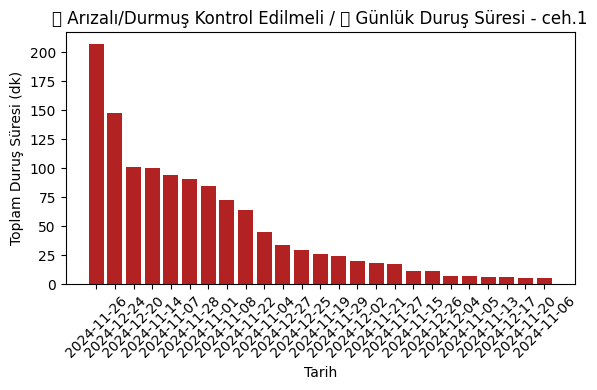

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


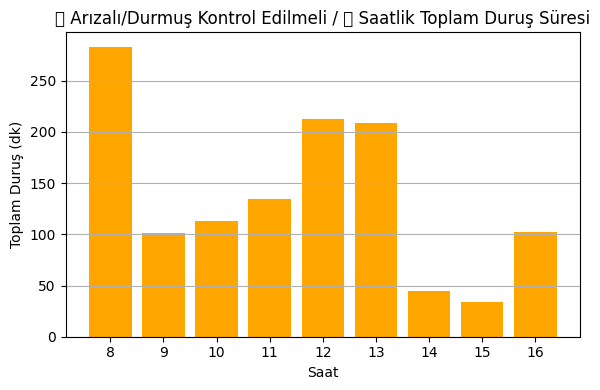

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:86: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


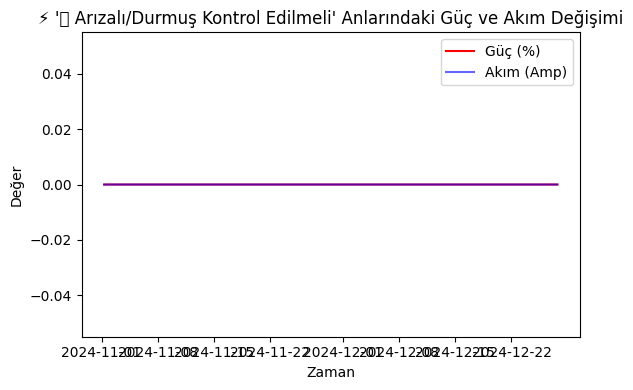


🔍 🔍 Arızalı/Durmuş Kontrol Edilmeli Arızası için İşleniyor: ceh.1_ust2_guc_% & ceh.1_ust2_amp. → ceh.1_ust2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


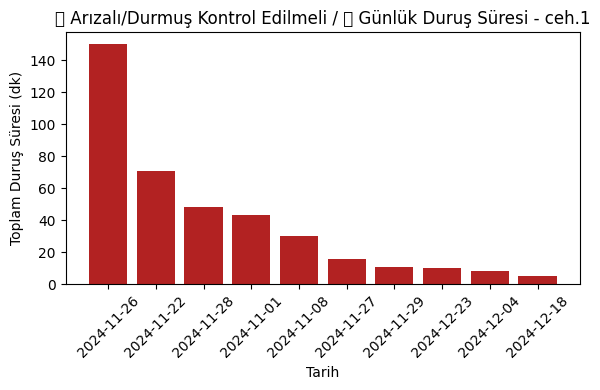

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


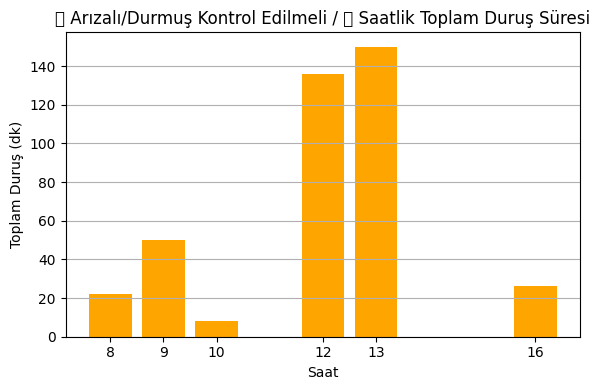

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:86: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


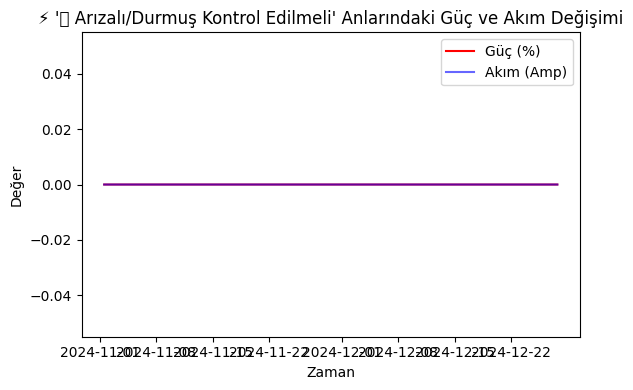


🔍 🔍 Arızalı/Durmuş Kontrol Edilmeli Arızası için İşleniyor: ceh.1_alt1_guc_% & ceh.1_alt1_amp. → ceh.1_alt1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


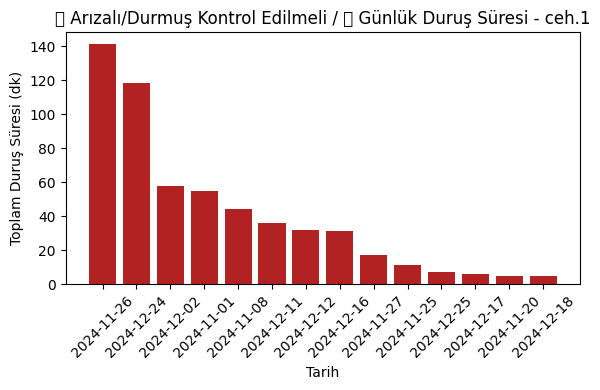

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


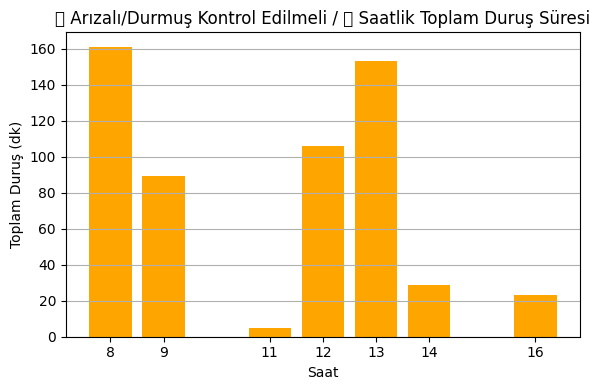

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:86: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


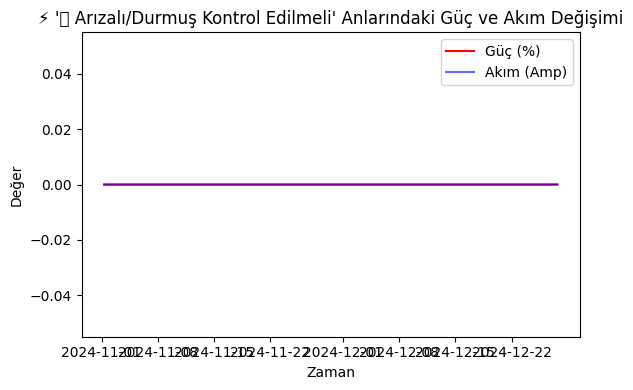


🔍 🔍 Arızalı/Durmuş Kontrol Edilmeli Arızası için İşleniyor: ceh.2_ust1_guc_% & ceh.2_ust1_amp. → ceh.2_ust1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


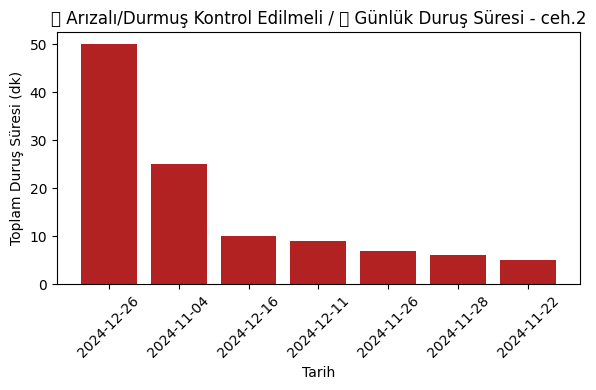

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


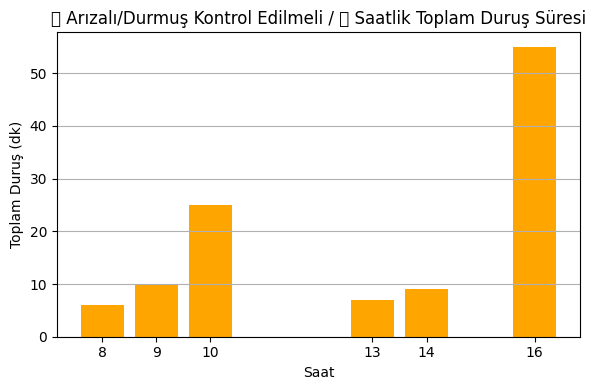

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:86: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


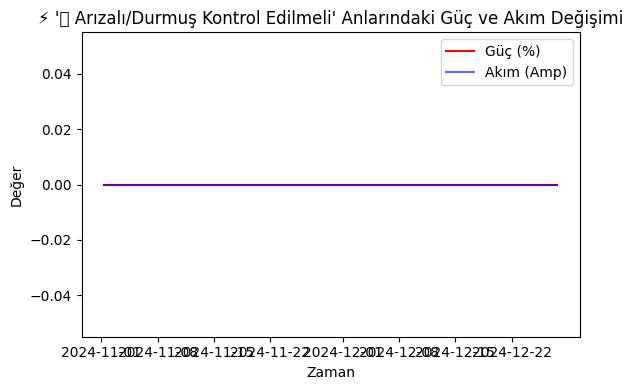


🔍 🔍 Arızalı/Durmuş Kontrol Edilmeli Arızası için İşleniyor: ceh.2_ust2_guc_% & ceh.2_ust2_amp. → ceh.2_ust2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


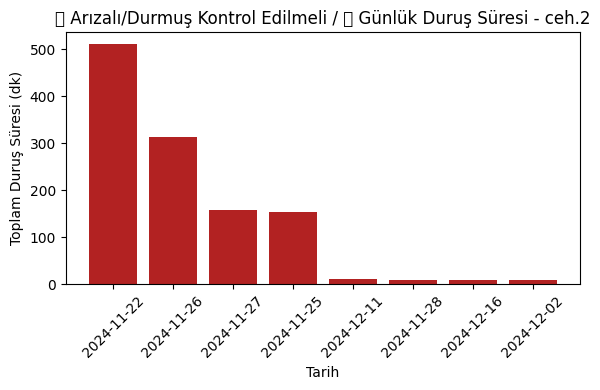

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


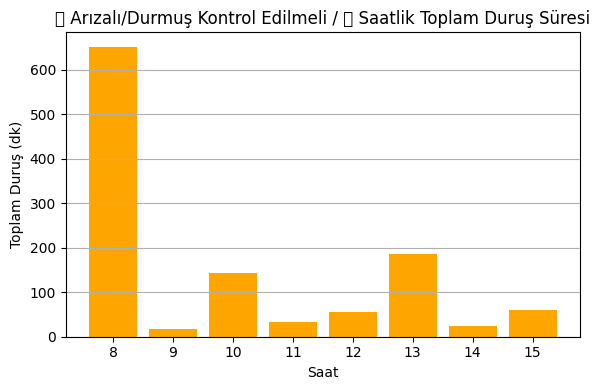

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:86: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


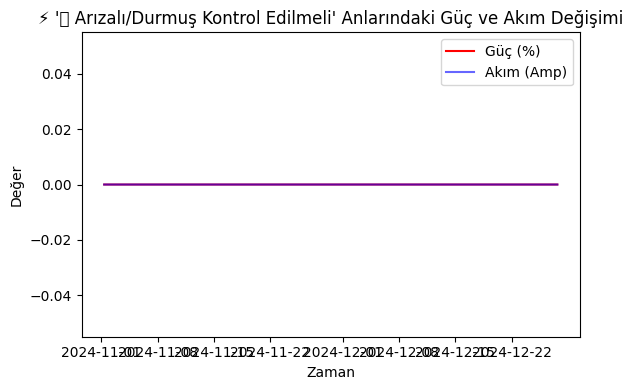


🔍 🔍 Arızalı/Durmuş Kontrol Edilmeli Arızası için İşleniyor: ceh.2_alt1_guc_% & ceh.2_alt1_amp. → ceh.2_alt1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


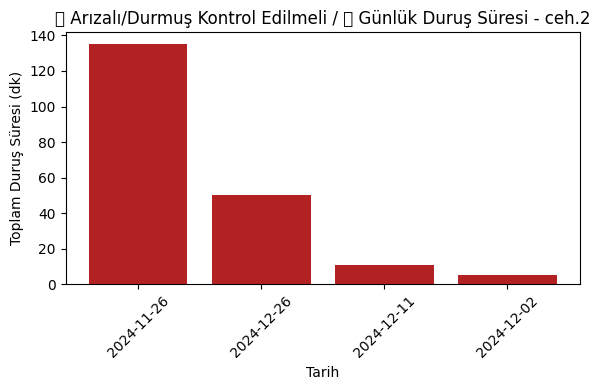

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


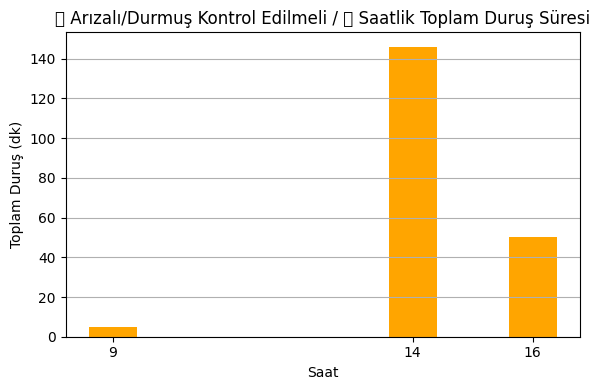

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:86: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


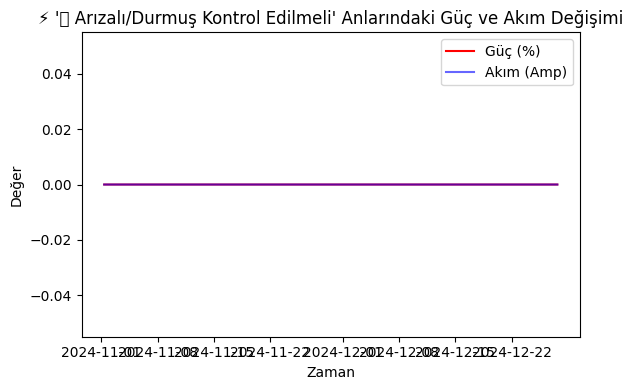


🔍 🔍 Arızalı/Durmuş Kontrol Edilmeli Arızası için İşleniyor: ceh.2_alt2_guc_% & ceh.2_alt2_amp. → ceh.2_alt2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


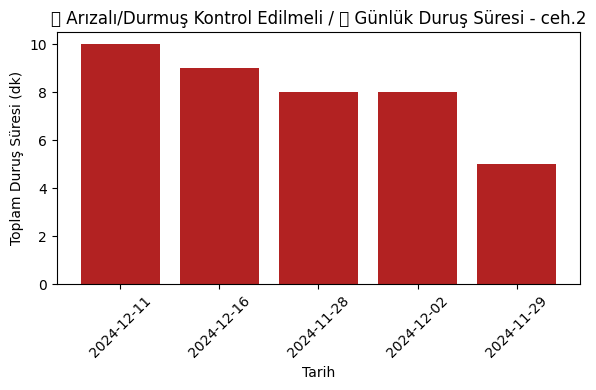

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


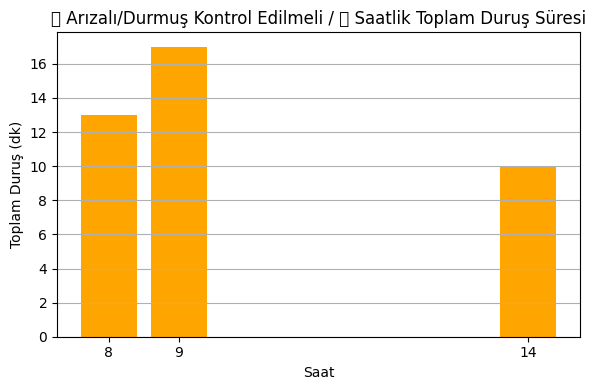

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:86: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


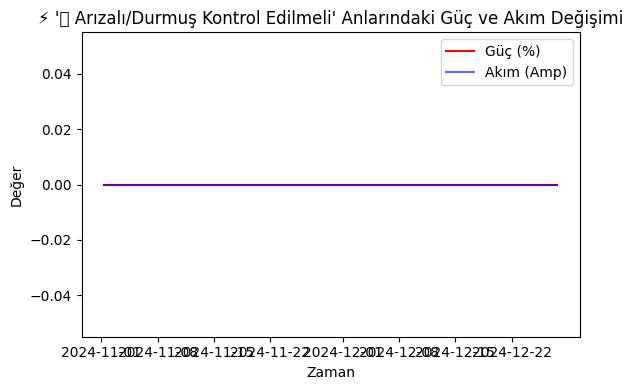


🔍 🔍 Arızalı/Durmuş Kontrol Edilmeli Arızası için İşleniyor: ceh.3_alt2_guc_% & ceh.3_alt2_amp. → ceh.3_alt2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


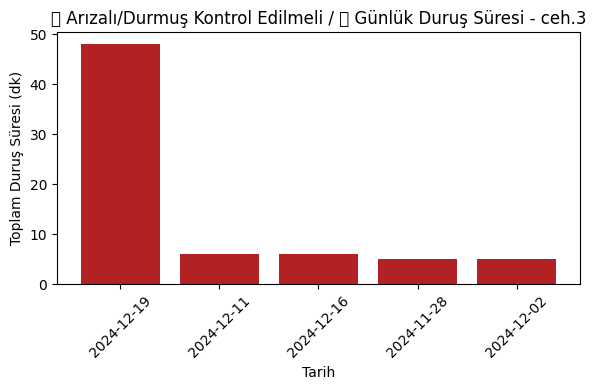

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


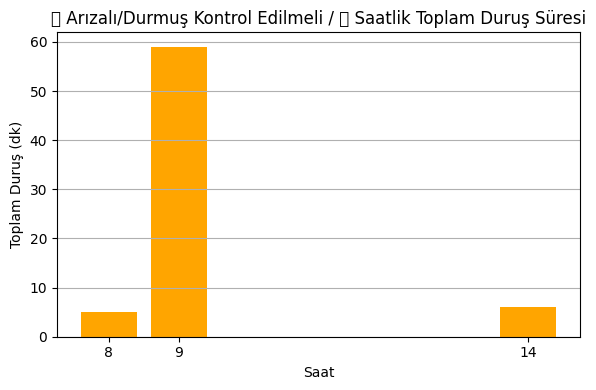

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:86: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


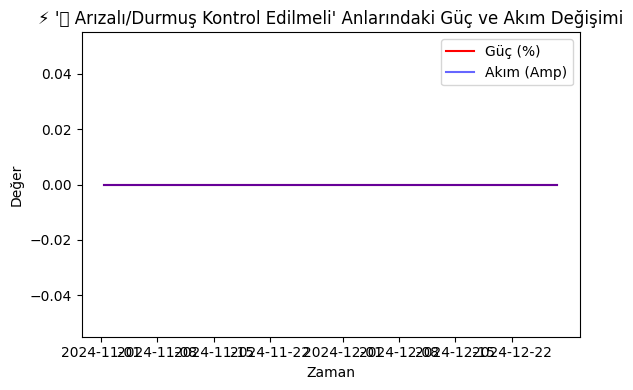

In [44]:
sensor_durumu_analyze(df, kolon_ciftleri, ariza_durum="🔍 Arızalı/Durmuş Kontrol Edilmeli")

# ⚠️ Güç sensör hatası


🔍 ⚠️ Güç sensör hatası Arızası için İşleniyor: ceh.1_ust1_guc_% & ceh.1_ust1_amp. → ceh.1_ust1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


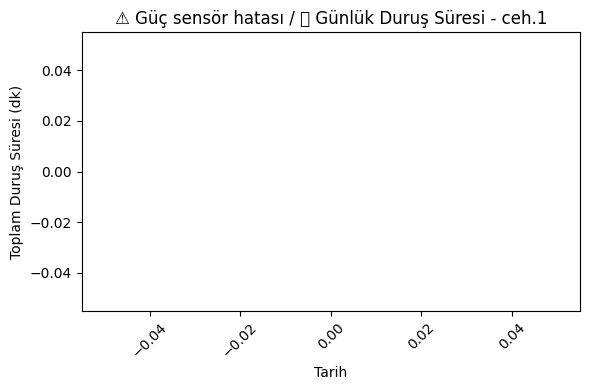

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


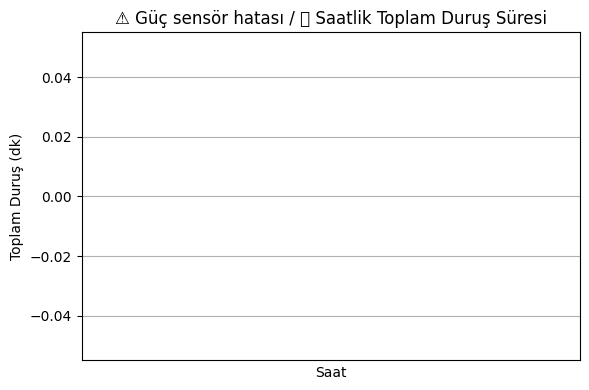

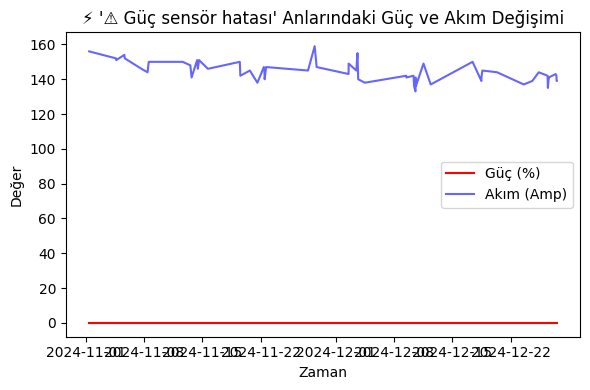


🔍 ⚠️ Güç sensör hatası Arızası için İşleniyor: ceh.1_ust2_guc_% & ceh.1_ust2_amp. → ceh.1_ust2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


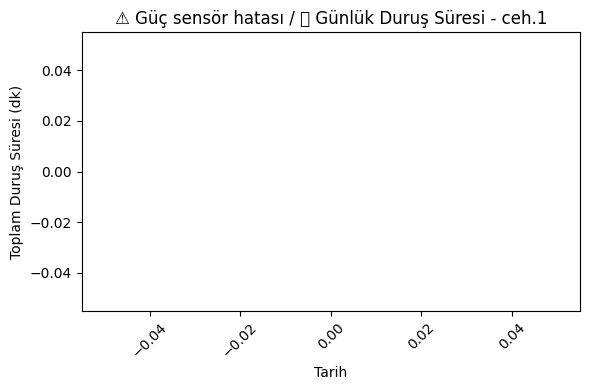

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


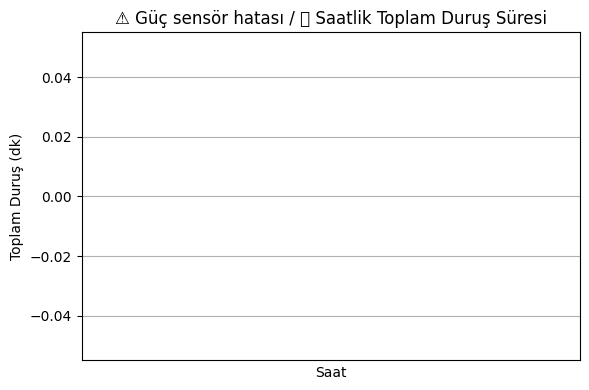

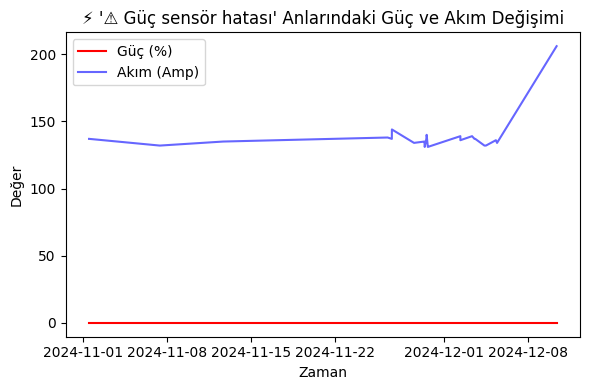


🔍 ⚠️ Güç sensör hatası Arızası için İşleniyor: ceh.1_alt1_guc_% & ceh.1_alt1_amp. → ceh.1_alt1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


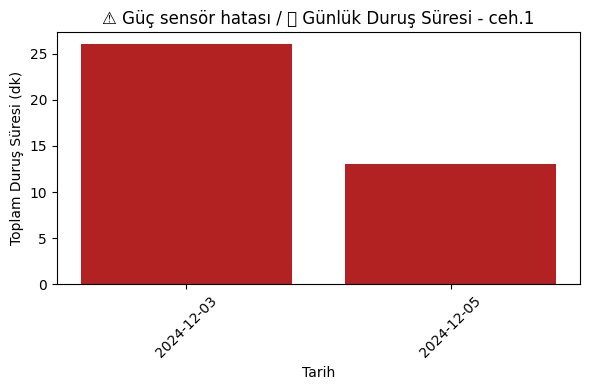

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


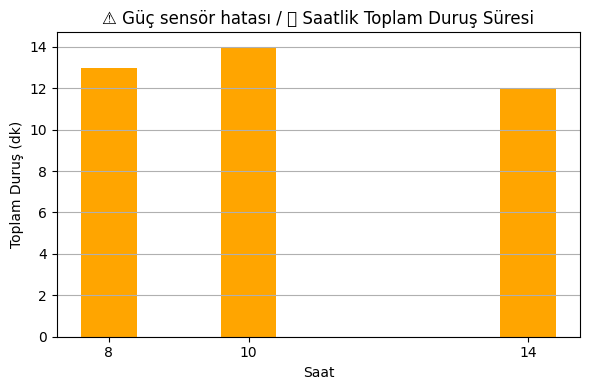

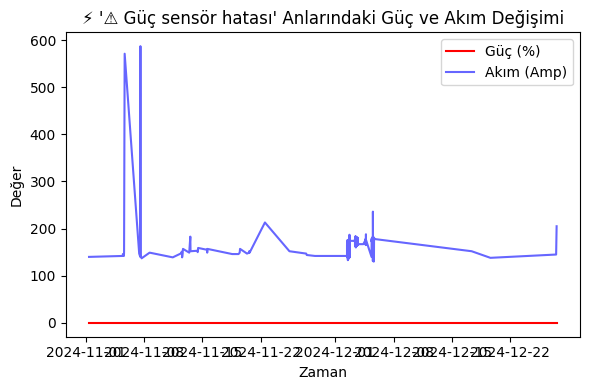


🔍 ⚠️ Güç sensör hatası Arızası için İşleniyor: ceh.2_ust1_guc_% & ceh.2_ust1_amp. → ceh.2_ust1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


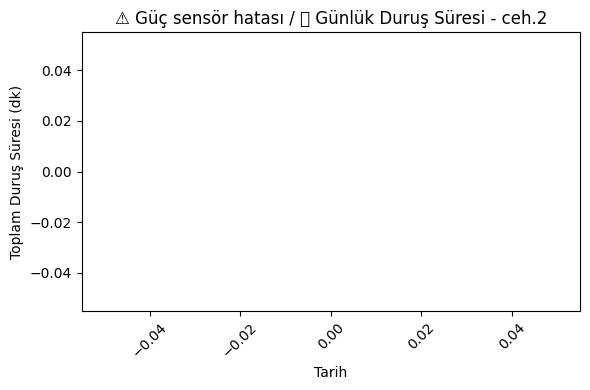

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


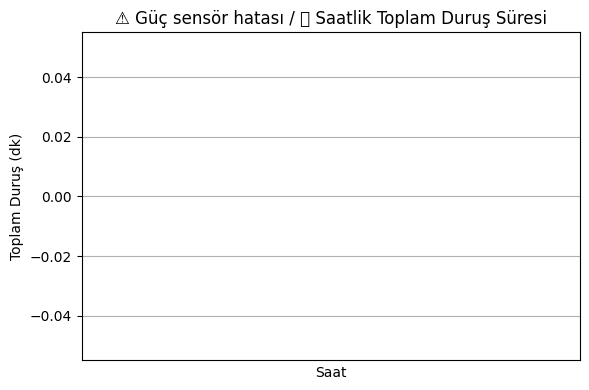

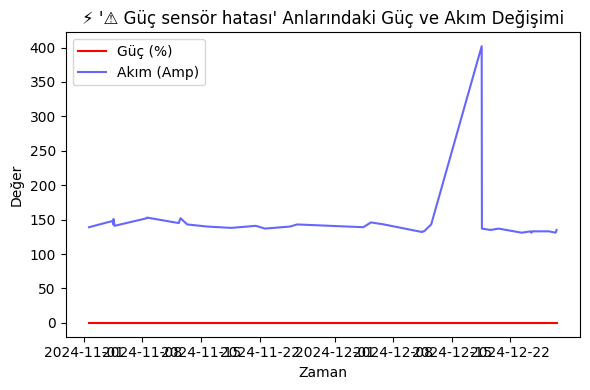


🔍 ⚠️ Güç sensör hatası Arızası için İşleniyor: ceh.2_ust2_guc_% & ceh.2_ust2_amp. → ceh.2_ust2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


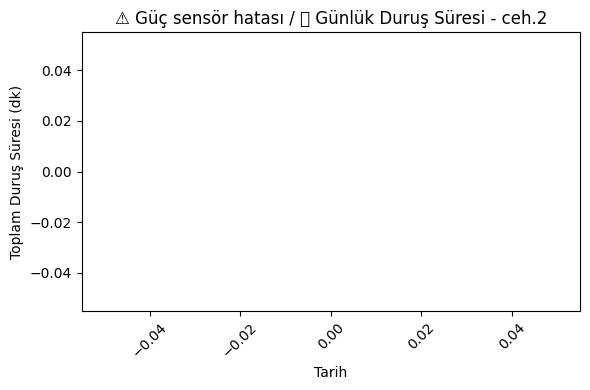

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


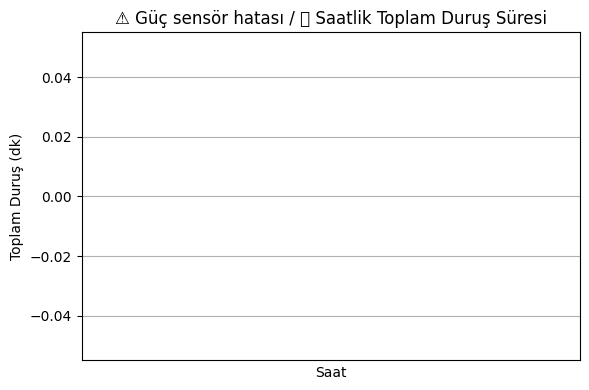

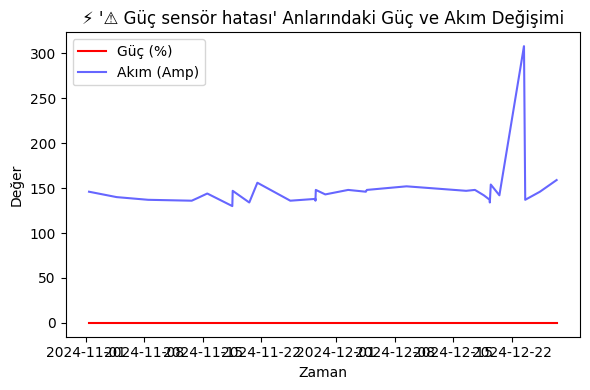


🔍 ⚠️ Güç sensör hatası Arızası için İşleniyor: ceh.2_alt1_guc_% & ceh.2_alt1_amp. → ceh.2_alt1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


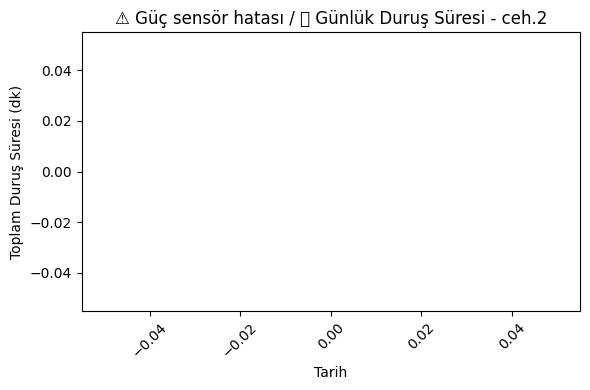

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


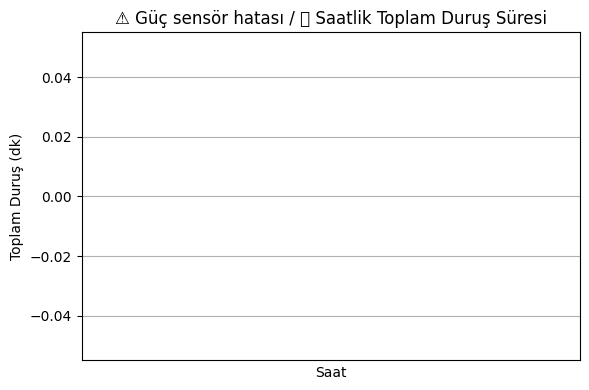

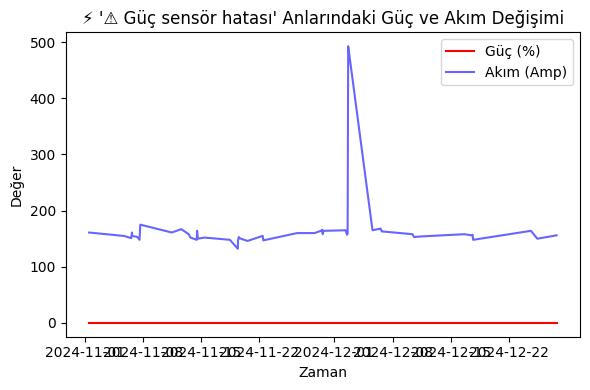


🔍 ⚠️ Güç sensör hatası Arızası için İşleniyor: ceh.2_alt2_guc_% & ceh.2_alt2_amp. → ceh.2_alt2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


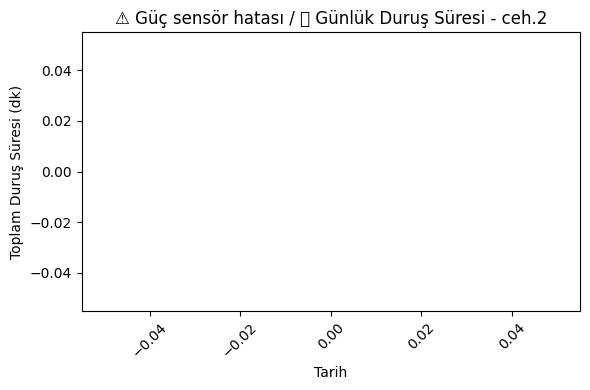

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


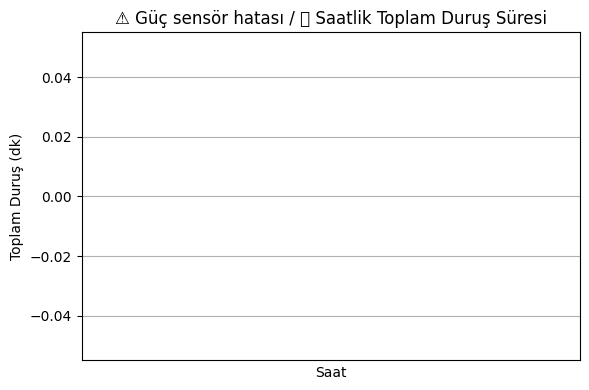

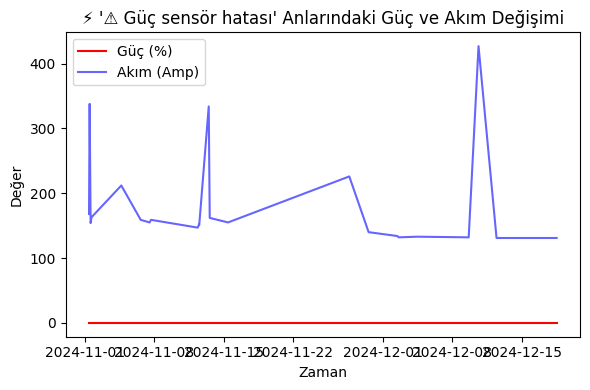


🔍 ⚠️ Güç sensör hatası Arızası için İşleniyor: ceh.3_alt2_guc_% & ceh.3_alt2_amp. → ceh.3_alt2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


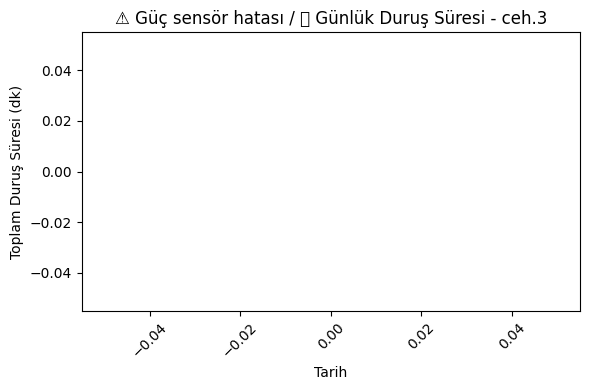

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


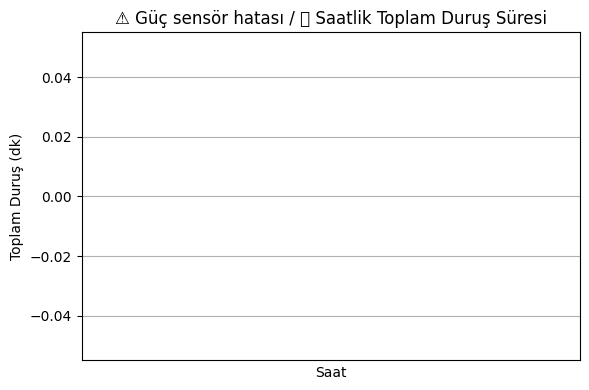

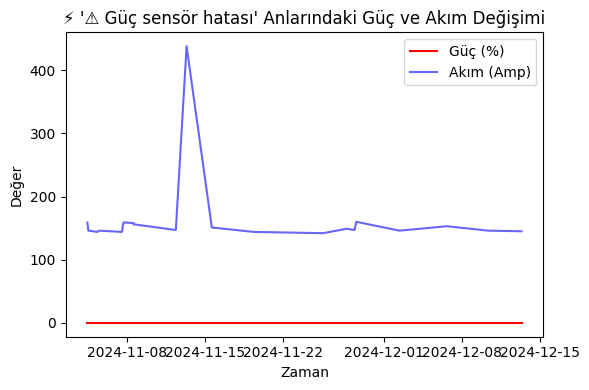

In [45]:
sensor_durumu_analyze(df, kolon_ciftleri, ariza_durum="⚠️ Güç sensör hatası")


# ⚠️ Akım sensör hatası


🔍 ⚠️ Akım sensör hatası Arızası için İşleniyor: ceh.1_ust1_guc_% & ceh.1_ust1_amp. → ceh.1_ust1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


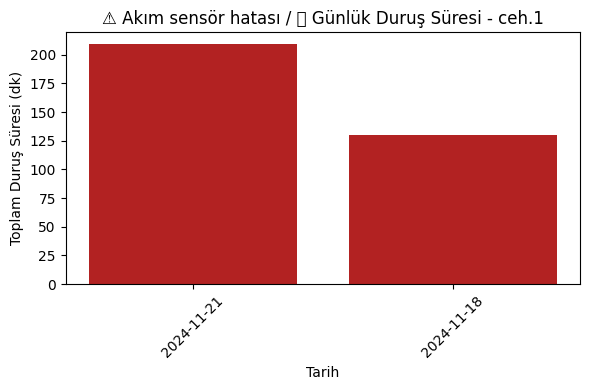

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


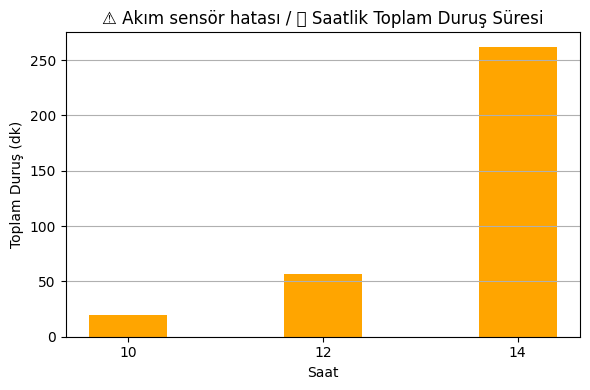

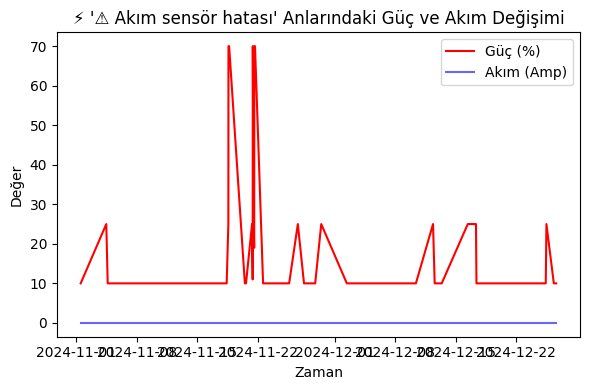


🔍 ⚠️ Akım sensör hatası Arızası için İşleniyor: ceh.1_ust2_guc_% & ceh.1_ust2_amp. → ceh.1_ust2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


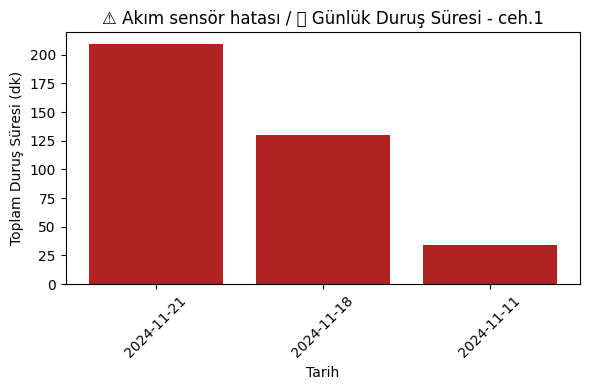

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


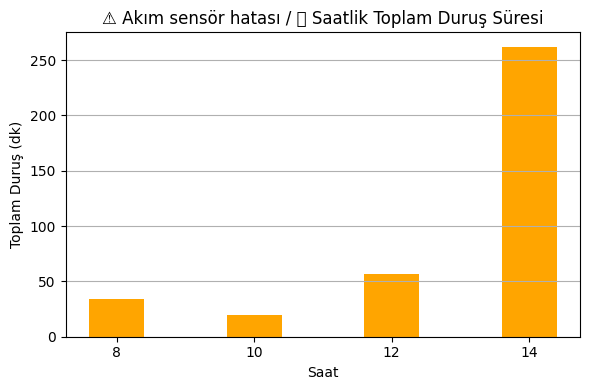

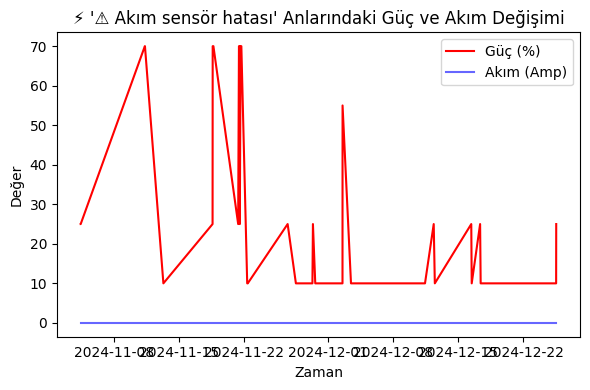


🔍 ⚠️ Akım sensör hatası Arızası için İşleniyor: ceh.1_alt1_guc_% & ceh.1_alt1_amp. → ceh.1_alt1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


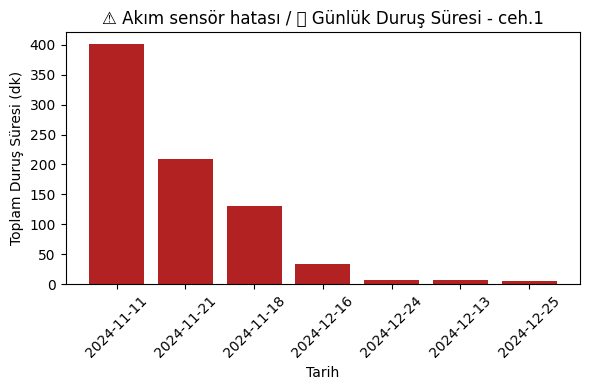

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


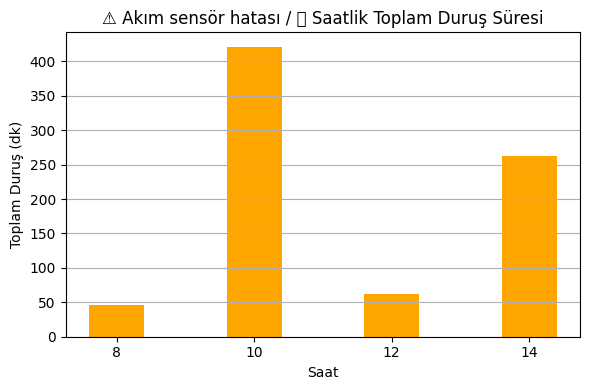

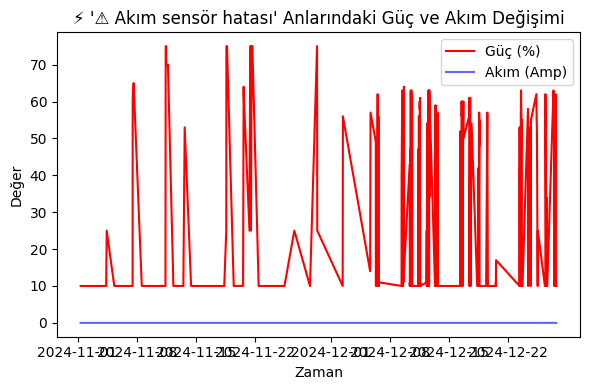


🔍 ⚠️ Akım sensör hatası Arızası için İşleniyor: ceh.2_ust1_guc_% & ceh.2_ust1_amp. → ceh.2_ust1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


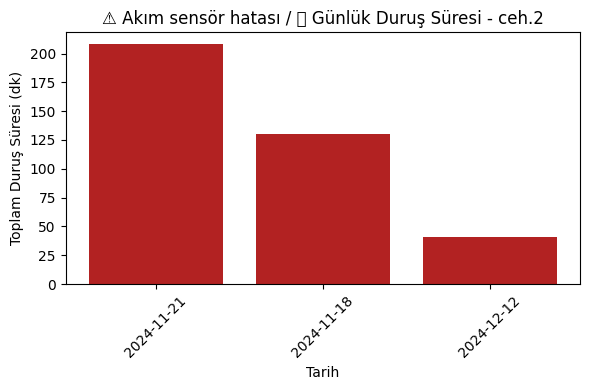

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


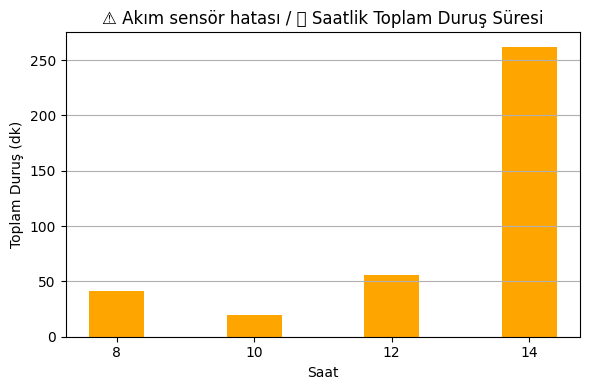

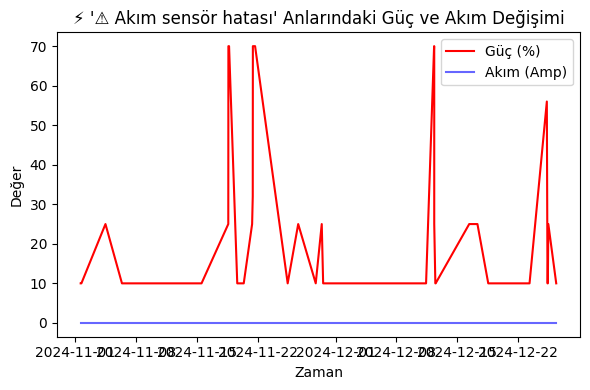


🔍 ⚠️ Akım sensör hatası Arızası için İşleniyor: ceh.2_ust2_guc_% & ceh.2_ust2_amp. → ceh.2_ust2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


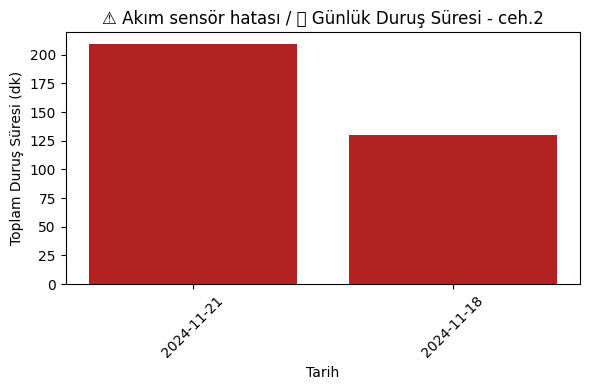

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


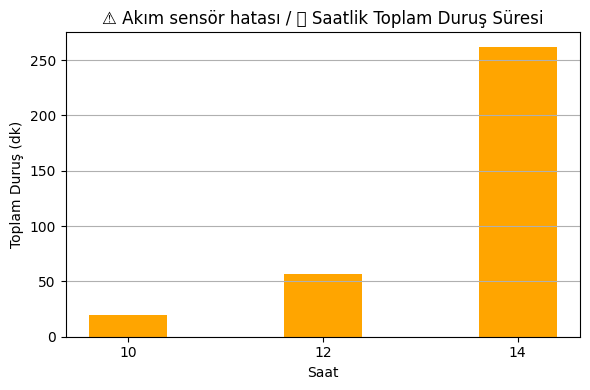

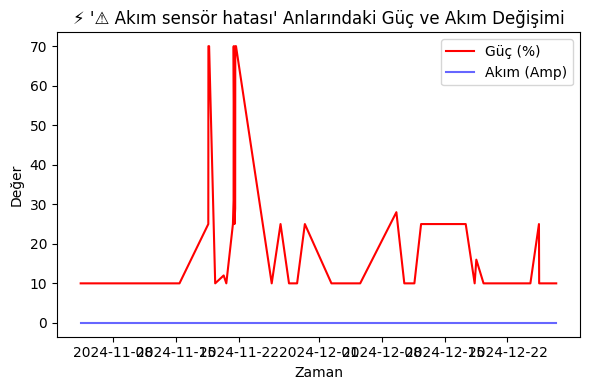


🔍 ⚠️ Akım sensör hatası Arızası için İşleniyor: ceh.2_alt1_guc_% & ceh.2_alt1_amp. → ceh.2_alt1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


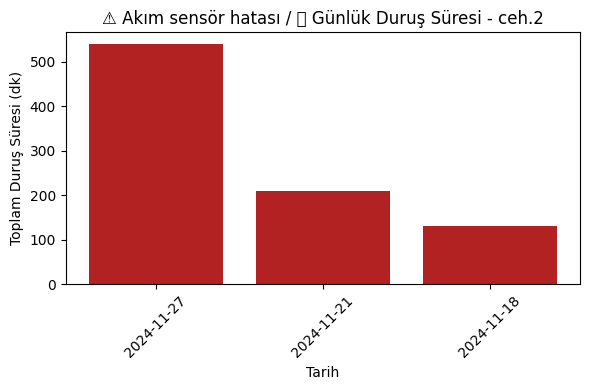

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


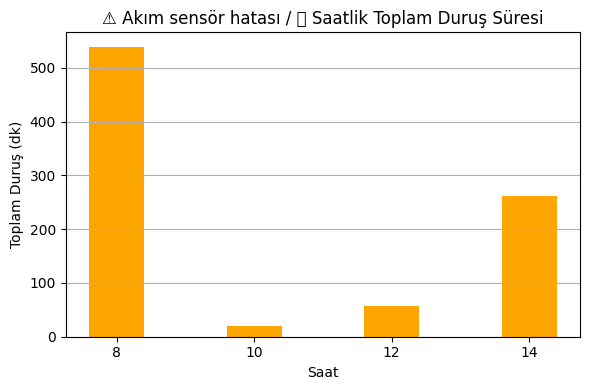

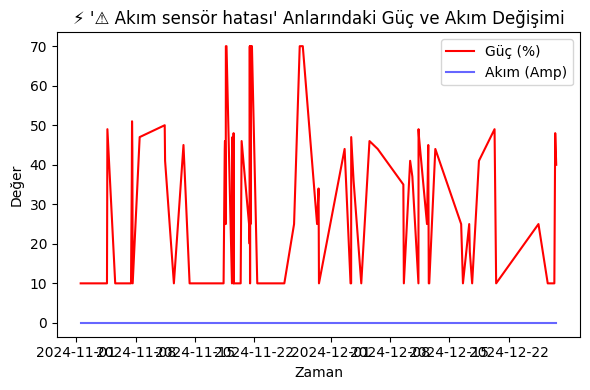


🔍 ⚠️ Akım sensör hatası Arızası için İşleniyor: ceh.2_alt2_guc_% & ceh.2_alt2_amp. → ceh.2_alt2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


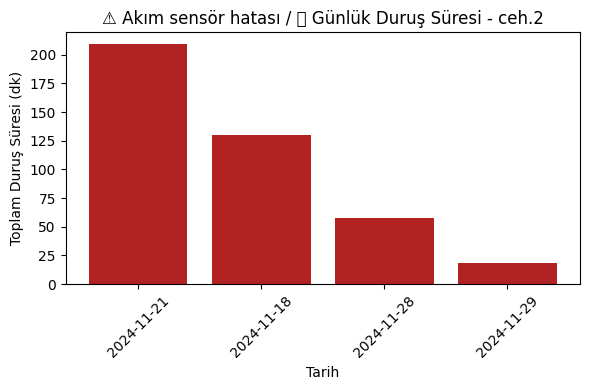

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


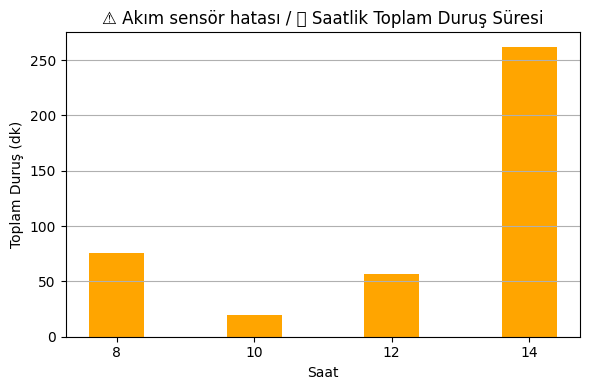

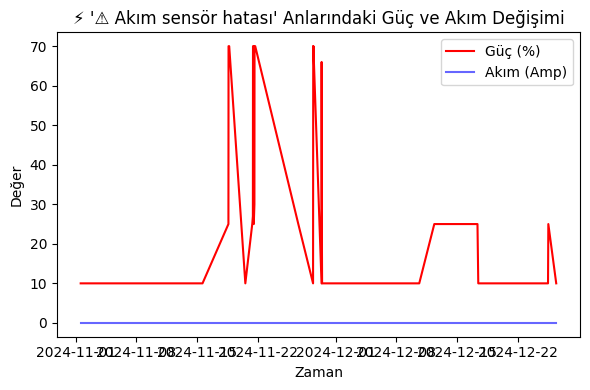


🔍 ⚠️ Akım sensör hatası Arızası için İşleniyor: ceh.3_alt2_guc_% & ceh.3_alt2_amp. → ceh.3_alt2_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


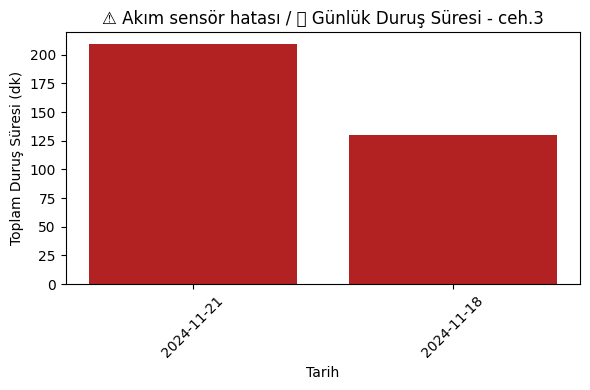

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


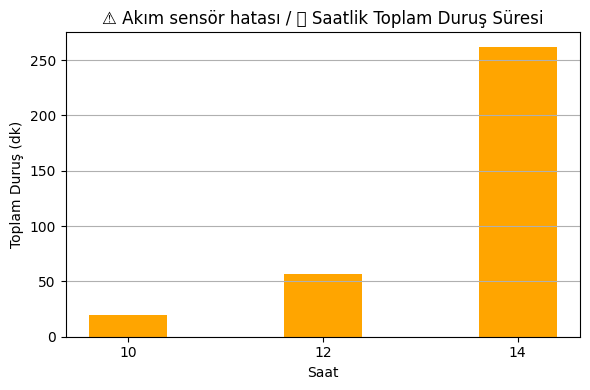

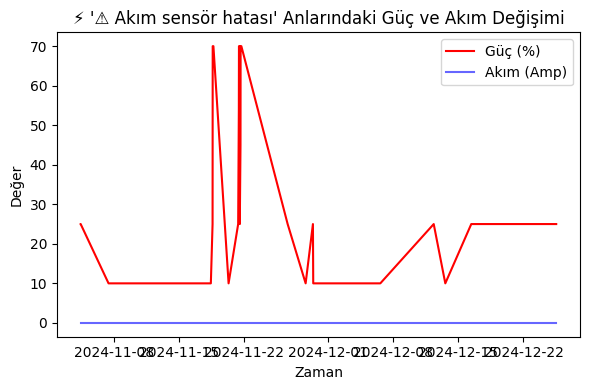

In [46]:
sensor_durumu_analyze(df, kolon_ciftleri, ariza_durum="⚠️ Akım sensör hatası")

### Raporlama için tek kolon çifti arızaları için durum analizi


🔍 🔍 Arızalı/Durmuş Kontrol Edilmeli Arızası için İşleniyor: ceh.1_alt1_guc_% & ceh.1_alt1_amp. → ceh.1_alt1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


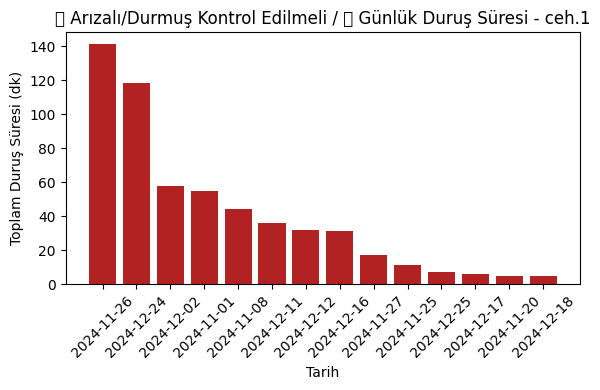

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


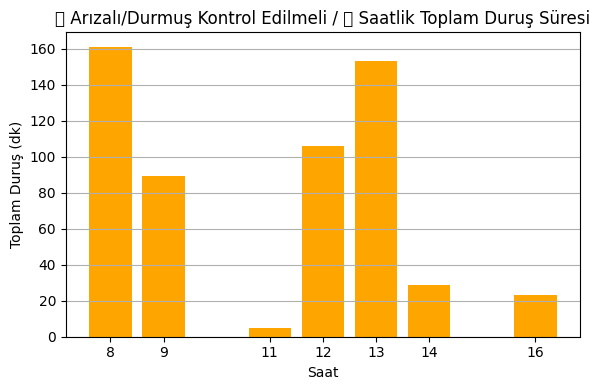

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:86: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


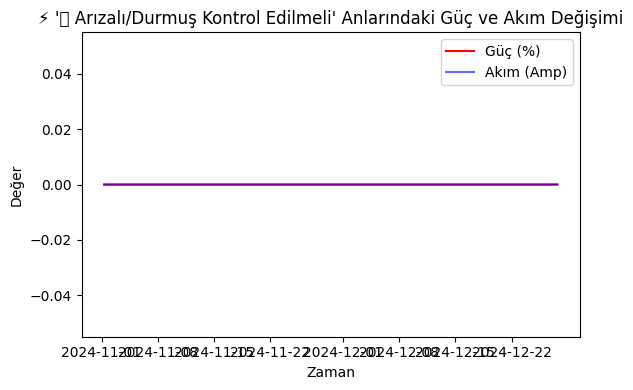

In [47]:
kolon_ciftleri = [("ceh.1_alt1_guc_%", "ceh.1_alt1_amp.")]
sensor_durumu_analyze(df, kolon_ciftleri, ariza_durum="🔍 Arızalı/Durmuş Kontrol Edilmeli")


🔍 ⚠️ Güç sensör hatası Arızası için İşleniyor: ceh.1_alt1_guc_% & ceh.1_alt1_amp. → ceh.1_alt1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


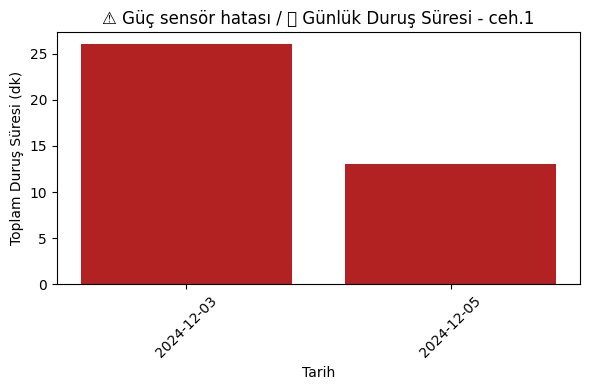

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


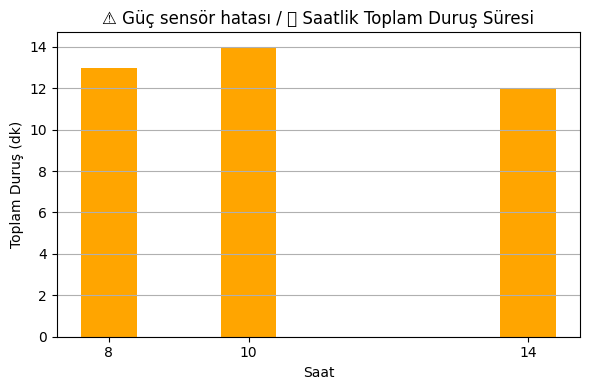

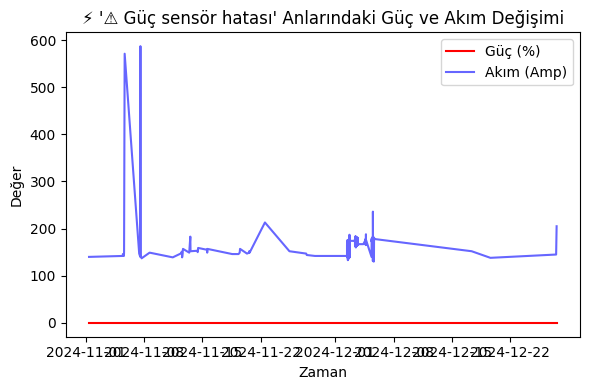

In [48]:
sensor_durumu_analyze(df, kolon_ciftleri, ariza_durum="⚠️ Güç sensör hatası")


🔍 ⚠️ Akım sensör hatası Arızası için İşleniyor: ceh.1_alt1_guc_% & ceh.1_alt1_amp. → ceh.1_alt1_durum
--------------------------------------------------


C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:52: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


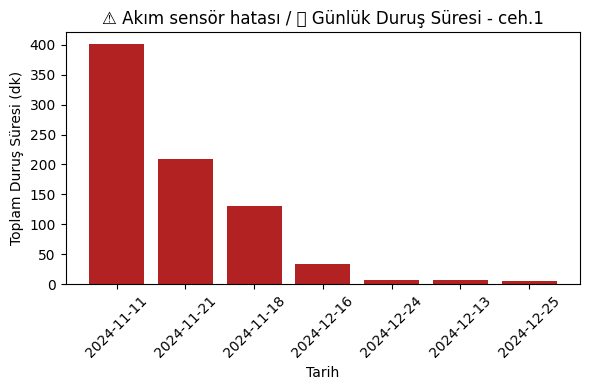

C:\Users\havva\AppData\Local\Temp\ipykernel_13140\1012191059.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


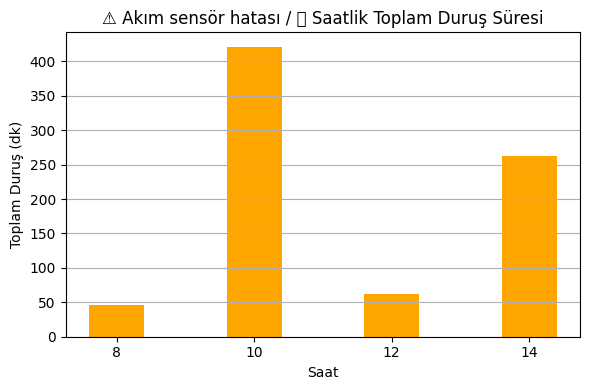

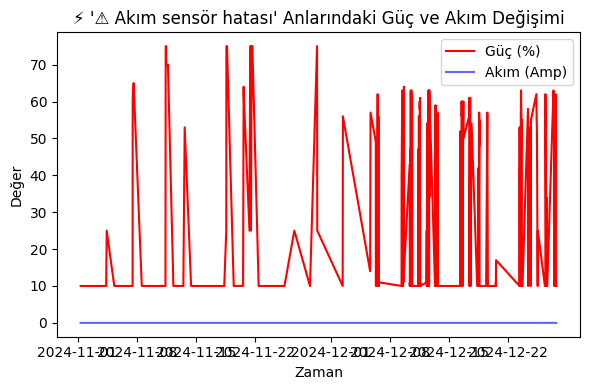

In [49]:
sensor_durumu_analyze(df, kolon_ciftleri, ariza_durum="⚠️ Akım sensör hatası")